# 1. Perkenalan

## 1.1. Latar Belakang Masalah

Dalam industri perbankan, pemberian pinjaman kepada nasabah merupakan salah satu sumber utama pendapatan. Namun, risiko gagal bayar (default) dari nasabah dapat menyebabkan kerugian finansial yang signifikan. Dengan semakin kompleksnya profil nasabah dan tingginya volume data yang dimiliki, proses penilaian kelayakan kredit secara manual menjadi kurang efisien dan rentan terhadap kesalahan.

Penggunaan model prediktif berbasis data dalam proses evaluasi nasabah menjadi solusi yang dapat meningkatkan akurasi keputusan pemberian kredit. Dengan model yang mampu mengidentifikasi nasabah yang berisiko tinggi gagal bayar, bank dapat meminimalkan kerugian, mengoptimalkan strategi mitigasi risiko, serta meningkatkan efisiensi operasional. Namun, tantangan utama dalam pengembangan model ini adalah ketidakseimbangan data, di mana jumlah nasabah yang gagal bayar jauh lebih sedikit dibandingkan yang tidak gagal bayar. Hal ini seringkali menyebabkan bias pada model, sehingga sulit mendeteksi nasabah yang benar-benar berisiko tinggi.

Oleh karena itu, diperlukan pengembangan model klasifikasi yang fokus pada minimalisasi False Negatives (FN) melalui optimalisi recall score. FN yang rendah sangat penting, karena kesalahan memprediksi nasabah sebagai tidak berisiko padahal sebenarnya berisiko gagal bayar dapat menimbulkan kerugian yang besar bagi perbankan. Model ini diharapkan dapat digunakan tools analisis awal yang efektif untuk mendukung keputusan strategis pemberian kredit.

## 1.2. Problem Statement

Mengembangkan model yang dapat memprediksi atau mengklasifikasikan apakah nasabah akan gagal bayar atau tidak berdasarkan data nasabah dan karakteristik yang dimilikinya agar dapat digunakan sebagai analisa awal apakah akan memberikan kredit terhadap nasabah tersebut guna mengurangi resiko gagal bayar dengan menggunakan metrics Recall Score minimal 60%.

# 2. Import Libraries

Pada bagian ini, saya akan mengimport libraries yang dibutuhkan dalam pengerjaan model ini.

In [1]:
# Handling Data
import pandas as pd
import numpy as np
from scipy import stats

# Plotting Data
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Saving files
import pickle
import json

# 3. Data Loading

Pada bagian ini, saya akan melakukan loading data yang dibutuhkan ke dalam dataframe untuk diproses lebih lanjut.

In [2]:
# Read data from CSV
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


Setiap baris pada data ini memberikan informasi mengenai apakah setiap orang dengan dengan karakteristik tertentu akan gagal bayar atau tidak.

In [3]:
# Mengecek info
df.shape

(67463, 35)

Terdapat 35 kolom dan 67.463 baris/data pada dataset ini.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

Kolom dan yang akan menjadi kolom target adalah `Loan Status` dengan nilai berikut.
- 1 = Defaulter
- 0 = Non Defaulters

Saya lebih suka bekerja dengan kolom tanpa spasi. Oleh karena itu, saya akan menghapus semua spasi yang ada pada setiap nama kolom.

In [5]:
# Remove whitespace from column name
for col in df.columns:
    df.rename(columns={col: col.replace(' ', '')}, inplace=True)

df.columns

Index(['ID', 'LoanAmount', 'FundedAmount', 'FundedAmountInvestor', 'Term',
       'BatchEnrolled', 'InterestRate', 'Grade', 'SubGrade',
       'EmploymentDuration', 'HomeOwnership', 'VerificationStatus',
       'PaymentPlan', 'LoanTitle', 'DebittoIncome', 'Delinquency-twoyears',
       'Inquires-sixmonths', 'OpenAccount', 'PublicRecord', 'RevolvingBalance',
       'RevolvingUtilities', 'TotalAccounts', 'InitialListStatus',
       'TotalReceivedInterest', 'TotalReceivedLateFee', 'Recoveries',
       'CollectionRecoveryFee', 'Collection12monthsMedical', 'ApplicationType',
       'LastweekPay', 'AccountsDelinquent', 'TotalCollectionAmount',
       'TotalCurrentBalance', 'TotalRevolvingCreditLimit', 'LoanStatus'],
      dtype='object')

In [6]:
df_filter = df.iloc[:, 9:12]
df_filter

,EmploymentDuration,HomeOwnership,VerificationStatus
0,MORTGAGE,176346.62670,Not Verified
1,RENT,39833.92100,Source Verified
2,MORTGAGE,91506.69105,Source Verified
3,MORTGAGE,108286.57590,Source Verified
4,MORTGAGE,44234.82545,Source Verified
...,...,...,...
67458,MORTGAGE,83961.15003,Verified
67459,RENT,65491.12817,Source Verified
67460,MORTGAGE,34813.96985,Verified
67461,OWN,96938.83564,Not Verified


In [7]:
df_filter.EmploymentDuration.value_counts()

EmploymentDuration
MORTGAGE    36351
RENT        24150
OWN          6962
Name: count, dtype: int64

Apabila dilihat dari hasil slicing data di atas, terdapat keanehan pada 2 kolom pertama.
- `EmploymentDuration` -> seharusnya merupakan data berapa lama karyawan tersebut telah bekerja. Namun isi kolom tersebut adalah MORTGAGE, RENT, dan OWN. Ini seharusnya data kepemilikan rumah (`HomeOwnership`). 
- `VerificationStatus` -> merupakan status verifikasi income oleh bank. Namun dari 35 kolom di atas, tidak ada satupun kolom yang memberikan info mengenai Income. Oleh karena itu, kolom `HomeOwnership` yang merupakan numeric merupakan kolom `Income`.

In [8]:
df.rename(columns={'EmploymentDuration': 'HomeOwnership',
                   'HomeOwnership': 'Income'}, inplace=True)
df

,ID,LoanAmount,FundedAmount,FundedAmountInvestor,Term,BatchEnrolled,InterestRate,Grade,SubGrade,HomeOwnership,Income,VerificationStatus,PaymentPlan,LoanTitle,DebittoIncome,Delinquency-twoyears,Inquires-sixmonths,OpenAccount,PublicRecord,RevolvingBalance,RevolvingUtilities,TotalAccounts,InitialListStatus,TotalReceivedInterest,TotalReceivedLateFee,Recoveries,CollectionRecoveryFee,Collection12monthsMedical,ApplicationType,LastweekPay,AccountsDelinquent,TotalCollectionAmount,TotalCurrentBalance,TotalRevolvingCreditLimit,LoanStatus
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


# 4. Exploratory Data Analysis (EDA)

## 4.1. Question 1
Bagaimana pengaruh grade nasabah terhadap kemampuan membayarnya?

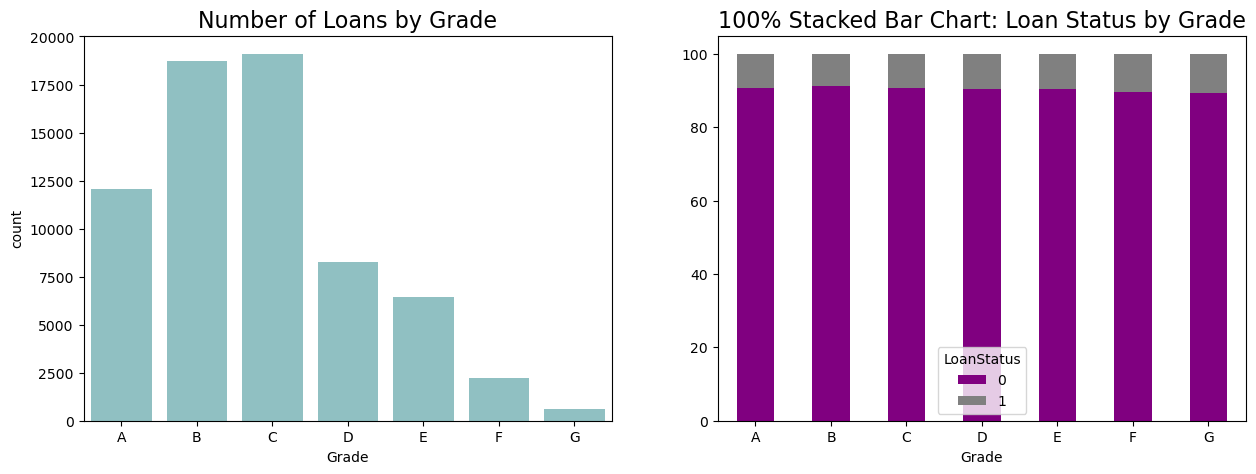

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sorted_grades = sorted(df['Grade'].unique())
sns.countplot(x="Grade", data=df, order=sorted_grades, ax=axes[0], color='#88c7ca')
axes[0].set_title('Number of Loans by Grade', fontsize=16)

# Group by 'Grade' and 'LoanStatus', then calculate the percentage for each 'LoanStatus'
grade_loanstatus_counts = df.groupby(['Grade', 'LoanStatus']).size().unstack(fill_value=0)
grade_loanstatus_percentage = grade_loanstatus_counts.div(grade_loanstatus_counts.sum(axis=1), axis=0) * 100

# Plotting the 100% stacked bar chart
colors = ['purple', 'grey']
grade_loanstatus_percentage.plot(kind='bar', stacked=True, ax=axes[1], color=colors)
axes[1].set_title('100% Stacked Bar Chart: Loan Status by Grade', fontsize=16)
plt.xticks(rotation=0)
plt.show()

Jumlah pinjaman terbanyak terlihat pada nasabah yang termasuk dalam kategori grade B dan C. Hal ini menunjukkan bahwa nasabah dengan grade ini cenderung memiliki permintaan pinjaman yang lebih tinggi dibandingkan dengan nasabah di kategori lainnya. Sebaliknya, jumlah pinjaman untuk nasabah dengan kategori F dan G sangat rendah. Kategori ini umumnya terdiri dari nasabah dengan profil risiko tinggi yang mengindikasikan bahwa perbankan lebih selektif dalam memberikan pinjaman kepada mereka.

Selain itu, ketika membandingkan tingkat keberhasilan pembayaran antara nasabah yang berhasil membayar pinjaman dan mereka yang gagal bayar, saya menemukan bahwa persentase keberhasilan dan kegagalan pembayaran cenderung seragam di setiap grade. Ini berarti nasabah dengan grade lebih tinggi (misalnya grade A atau B) tidak selalu lebih sukses dalam membayar pinjaman dibandingkan dengan nasabah yang berada di grade lebih rendah seperti F atau G. 

## 4.2. Question 2
Bagaimnara rata-rata tingkat suku bunga berdasarkan grade?

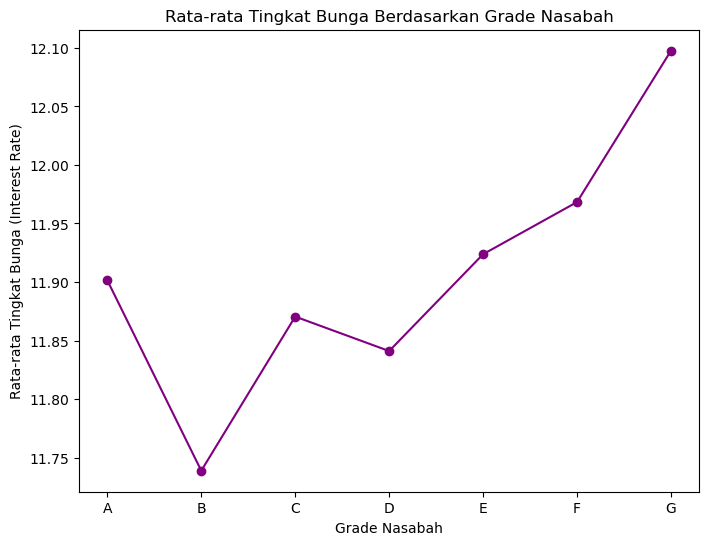

In [10]:
# Menghitung rata-rata Interest Rate berdasarkan Grade
average_interest_by_grade = df.groupby('Grade')['InterestRate'].mean()

# Membuat Bar Chart untuk rata-rata Interest Rate berdasarkan Grade
plt.figure(figsize=(8, 6))
average_interest_by_grade.plot(kind='line', color='purple', marker='o')
plt.title('Rata-rata Tingkat Bunga Berdasarkan Grade Nasabah')
plt.xlabel('Grade Nasabah')
plt.ylabel('Rata-rata Tingkat Bunga (Interest Rate)')
plt.xticks(rotation=0)
plt.show()

Berdasarkan gambar di atas, rata-rata tingkat suku bunga pinjaman cenderung naik seiring dengan meningkatnya profil resiko nasabah. Hal ini dapat dipahami karena semakin tinggi profil resiko nasabah maka resiko bagi perbankan juga akan meningkat karena kemungkinan nasabah mengalami gagal bayar cukup tinggi. Oleh karena itu, hal tersebut perlu dikompensasi dengan memberikan suku bunga yang lebih tinggi bagi nasabah yang lebih beresiko. Namun nasabah dengan grade A menunjukkan anomali dimana rata-rata suku bunga pinjamannya bahkan lebih tinggi dibandingkan dengan nasabah dari grade D.

## 4.3. Question 3
Apakah ada pengaruh antara jenis kepemilikan rumah dengan jumlah pinjaman?

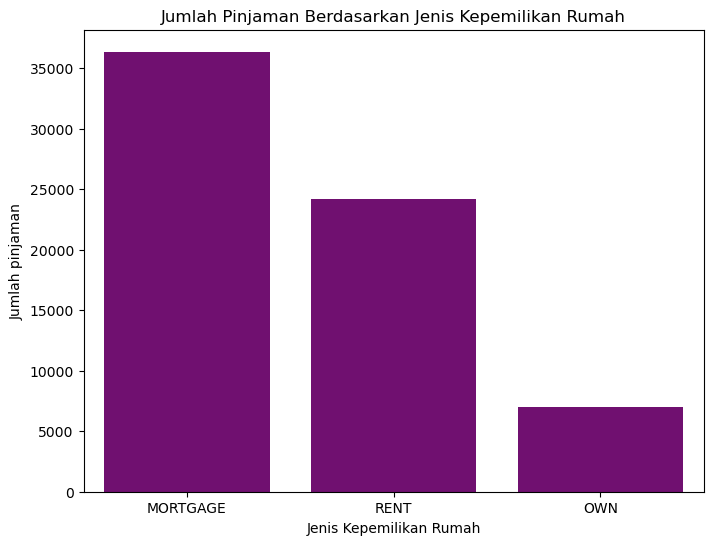

In [11]:
# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HomeOwnership', color='purple')
plt.title('Jumlah Pinjaman Berdasarkan Jenis Kepemilikan Rumah')
plt.xlabel('Jenis Kepemilikan Rumah')
plt.ylabel('Jumlah pinjaman')
plt.xticks(rotation=0)
plt.show()

Berdasarkan grafik yang di atas, dapat dilihat bahwa kategori nasabah yang memiliki jumlah pinjaman terbanyak adalah yang memiliki rumah dengan tipe mortgage. Hal ini menunjukkan bahwa nasabah yang memiliki rumah dengan mortgage cenderung mendapatkan pinjaman lebih banyak dibandingkan dengan kategori lainnya. Ini mungkin disebabkan oleh fakta bahwa properti dengan tipe mortgage biasanya melibatkan kewajiban pembayaran yang lebih besar sehingga nasabah membutuhkan lebih banyak dana untuk mendukung pembiayaan tersebut.

Di sisi lain, kategori nasabah yang memiliki rumah dengan status own (memiliki rumah tanpa pinjaman) mencatatkan jumlah pinjaman yang paling sedikit. Nasabah dalam kategori ini mungkin sudah lebih mandiri secara finansial sehingga tidak terlalu banyak yang membutuhkan pinjaman.

Secara keseluruhan, grafik ini menggambarkan bahwa jenis kepemilikan rumah berhubungan erat dengan jumlah pinjaman yang diberikan kepada nasabah. Nasabah dengan mortgage cenderung mendapatkan pinjaman lebih besar, sementara yang memiliki rumah lebih sedikit membutuhkan pinjaman.

## 4.4. Question 4
Apakah jumlah income mempengaruhi status loan?

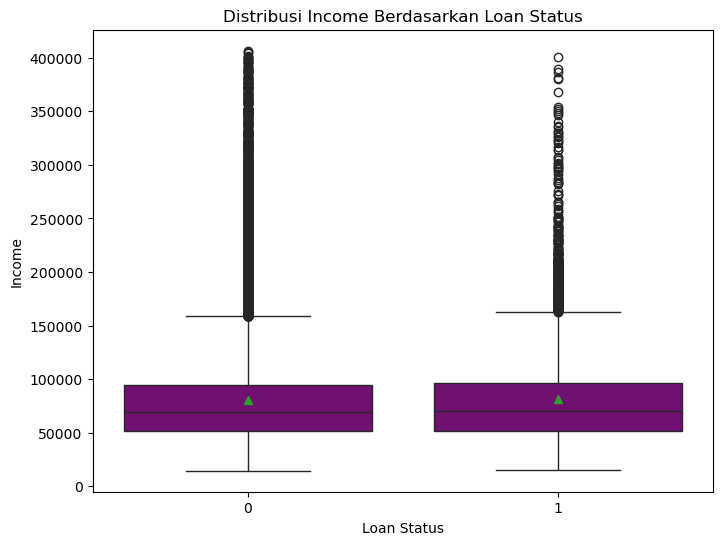

In [12]:
# Membuat Boxplot untuk distribusi Income berdasarkan Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='LoanStatus', y='Income', data=df, color='purple', showmeans=True)
plt.title('Distribusi Income Berdasarkan Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

Berdasarkan gambar box plot di atas, terlihat bahwa nilai Q1, Q2, dan Q3 income untuk kedua kelompok tersebut mirip sehingga dapat disimpulkan bahwa income tidak secara signifikan memengaruhi loan status.

## 4.5. Question 5
Berapa perbandingan nasabah yang mengalami gagal bayar dan tidak?

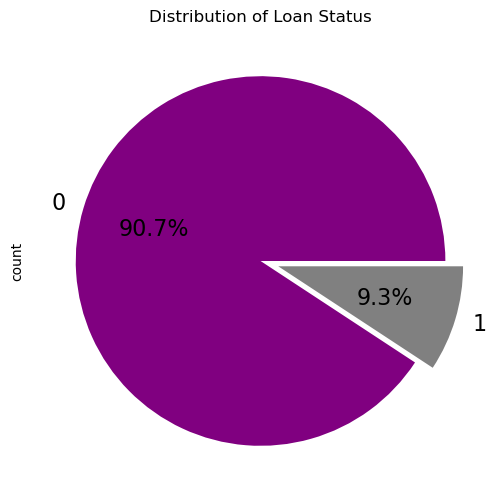

In [13]:
# Pie Chart
fig = plt.figure(figsize = (11,6))
plt.title("Distribution of Loan Status")
df["LoanStatus"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", colors = ['purple', 'gray'],
                                   textprops={'fontsize': 16}, explode = (0, 0.1))
plt.show()

Berdasarkan pengecekan distribusi data di atas, dapat dilihat bahwa nasabah yang mengalami gagal bayar ada di sekitar 9.3%. Hal ini perlu dibandingkan dengan metrics yang dimiliki oleh perusahaan mengenai berapa maksimal nasabah yang boleh mengalami gagal bayar.

Berdasarkan pengecekan distribusi data di atas, dapat dilihat bahwa sekitar 9,3% nasabah mengalami gagal bayar. Angka ini perlu dibandingkan dengan metrik yang telah ditetapkan oleh perusahaan terkait batas toleransi. Dengan membandingkan angka 9,3% ini dengan batas toleransi yang ada, perusahaan dapat mengevaluasi apakah tingkat gagal bayar tersebut berada dalam rentang yang masih dapat diterima atau perlu tindakan lebih lanjut, seperti peninjauan kembali kebijakan peminjaman atau peningkatan strategi mitigasi risiko.

## 4.6. Check Data Type for Each Column

Berikut adalah keterangan masing-masing kolom berdasarkan info dari Kaggle.

Kolom | Tipe Data | Keterangan
----- | :-------: | ----------
ID | Int | unique ID of representative
Loan Amount | Int| loan amount applied
Funded Amount | Int| loan amount funded
Funded Amount Investor | Float | loan amount approved by the investors
Term | Int | term of loan (in months)
Batch Enrolled | Object | batch numbers to representatives
Interest Rate | Float | interest rate (%) on loan
Grade | Object | grade by the bank
Sub Grade | Object | sub-grade by the bank
Employment Duration | Object | duration 
Home Ownership | Float | Owner ship of home
Verification Status | Object | Income verification by the bank
Payment Plan | Object | if any payment plan has started against loan
Loan Title | Object | loan title provided 
Debit to Income | Float | ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage
Delinquency - two years | Int | number of 30+ days delinquency in past 2 years
Inquires - six months | Int | total number of inquiries in last 6 months
Open Account | Int | number of open credit line in representative's credit line
Public Record | Int | number of derogatory public records
Revolving Balance | Int | total credit revolving balance
Revolving Utilities | Float | amount of credit a representative is using relative to revolving_balance
Total Accounts | Int | total number of credit lines available in representatives credit line
Initial List Status | Object | unique listing status of the loan - `W(Waiting)`, `F(Forwarded)`
Total Received Interest | Float | total interest received till date
Total Received Late Fee | Float |  total late fee received till date
Recoveries | Float | post charge off gross recovery
Collection Recovery Fee | Float | post charge off collection fee
Collection 12 months Medical | Int | total collections in last 12 months excluding medical collections
Application Type | Object | indicates when the representative is an individual or joint
Last week Pay | Int | indicates how long (in weeks) a representative has paid EMI after batch enrolled
Accounts Delinquent | Int | number of accounts on which the representative is delinquent
Total Collection Amount | Int | total current balance from all accounts
Total Current Balance | Int | total current balance from all accounts
Total Revolving Credit Limit | Int | total revolving credit limit
Loan Status | Int | `1 = Defaulter`, `0 = Non Defaulters` (Target feature)

In [14]:
def check_cardinality(data, columns=None):
    """Fungsi ini digunakan untuk mengecek level kardinalitas suatu data.

    Parameters
    ----------
    data
        Dataframe dari sebuah data yang akan dicek

    Returns
    -------
        Dataframe yang berisi jumlah unique value dan nilai unique value dari setiap kolom
    """

    if columns is None:
        columns = data.columns

    # List penampung unique value dan jumlah unique value
    num_unique = []
    unique_value = []

    # Looping untuk mengecek setiap kolom
    for col in columns:
        num_unique.append(data[col].nunique())
        unique_value.append(','.join(map(str, data[col].unique())))     # Mengubah dari list menjadi string  

    return pd.DataFrame({'Column':columns,
                         'JumlahUniqueValue':num_unique,
                         'UniqueValue':unique_value})

In [15]:
# Mengecek hanya untuk kolom dengan tipe `object`
df.select_dtypes(include='object')

,BatchEnrolled,Grade,SubGrade,HomeOwnership,VerificationStatus,PaymentPlan,LoanTitle,InitialListStatus,ApplicationType
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
67458,BAT3193689,C,A4,MORTGAGE,Verified,n,Credit card refinancing,w,INDIVIDUAL
67459,BAT1780517,C,B3,RENT,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
67460,BAT1761981,A,F3,MORTGAGE,Verified,n,Lending loan,w,INDIVIDUAL
67461,BAT2333412,D,E3,OWN,Not Verified,n,Debt consolidation,f,INDIVIDUAL


In [16]:
# Check cardinality
check_cardinality(df, columns=df.select_dtypes(include='object').columns)

,Column,JumlahUniqueValue,UniqueValue
0,BatchEnrolled,41,"BAT2522922,BAT1586599,BAT2136391,BAT2428731,BA..."
1,Grade,7,"B,C,F,A,G,E,D"
2,SubGrade,35,"C4,D3,D4,C3,G5,C5,A5,C2,B5,B1,B4,A4,B2,D2,C1,F..."
3,HomeOwnership,3,"MORTGAGE,RENT,OWN"
4,VerificationStatus,3,"Not Verified,Source Verified,Verified"
5,PaymentPlan,1,n
6,LoanTitle,109,"Debt Consolidation,Debt consolidation,Credit c..."
7,InitialListStatus,2,"w,f"
8,ApplicationType,2,"INDIVIDUAL,JOINT"


9 feature di atas merupakan feature yang memiliki tipe object sehingga merupakan feature kategorikal dan akan dimasukkan ke dalam variabel `col_cat`.

In [17]:
# Mengecek hanya untuk kolom dengan tipe `object`
df.select_dtypes(exclude='object')

,ID,LoanAmount,FundedAmount,FundedAmountInvestor,Term,InterestRate,Income,DebittoIncome,Delinquency-twoyears,Inquires-sixmonths,OpenAccount,PublicRecord,RevolvingBalance,RevolvingUtilities,TotalAccounts,TotalReceivedInterest,TotalReceivedLateFee,Recoveries,CollectionRecoveryFee,Collection12monthsMedical,LastweekPay,AccountsDelinquent,TotalCollectionAmount,TotalCurrentBalance,TotalRevolvingCreditLimit,LoanStatus
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,9.408858,83961.15003,28.105127,1,0,13,0,4112,97.779389,19,1978.945960,0.023478,564.614852,0.865230,0,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,9.972104,65491.12817,17.694279,0,0,12,0,9737,15.690703,14,3100.803125,0.027095,2.015494,1.403368,0,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,19.650943,34813.96985,10.295774,0,0,7,1,2195,1.500090,9,2691.995532,0.028212,5.673092,1.607093,0,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,13.169095,96938.83564,7.614624,0,0,14,0,1172,68.481882,15,3659.334202,0.074508,1.157454,0.207608,0,73,0,61,361339,39075,0


In [18]:
# Check cardinality
numerik = check_cardinality(df, df.select_dtypes(exclude='object').columns)
numerik

,Column,JumlahUniqueValue,UniqueValue
0,ID,67463,"65087372,1450153,1969101,6651430,14354669,5050..."
1,LoanAmount,27525,"10000,3609,28276,11170,16890,34631,30844,20744..."
2,FundedAmount,24548,"32236,11940,9311,6954,13226,30203,19773,10609,..."
3,FundedAmountInvestor,67441,"12329.36286,12191.99692,21603.22455,17877.1558..."
4,Term,3,"59,36,58"
5,InterestRate,67448,"11.13500686,12.23756263,12.54588365,16.7312014..."
6,Income,67454,"176346.6267,39833.921,91506.69105,108286.5759,..."
7,DebittoIncome,67454,"16.28475781,15.41240945,28.13761862,18.0437300..."
8,Delinquency-twoyears,9,"1,0,3,6,2,7,5,4,8"
9,Inquires-sixmonths,6,"0,3,2,1,4,5"


Kolom yang patut dicurigasi sebagai kolom kategorikal yang sudah di encoding adalah kolom-kolom dengan kardinalitas yang rendah. Oleh karena itu, saya akan memfilter kolom numerik dengan unique value < 10.

In [19]:
# Filter kolom numerik dengan unique value kurang dari 10
numerik[numerik['JumlahUniqueValue'] < 10]

,Column,JumlahUniqueValue,UniqueValue
4,Term,3,"59,36,58"
8,Delinquency-twoyears,9,"1,0,3,6,2,7,5,4,8"
9,Inquires-sixmonths,6,"0,3,2,1,4,5"
11,PublicRecord,5,"0,1,2,4,3"
19,Collection12monthsMedical,2,"0,1"
21,AccountsDelinquent,1,0
25,LoanStatus,2,"0,1"


Dari 7 kolom di atas, saya akan menjabarkan untuk masing-masing kolom.
- `Term` -> feature kategorikal karena hanya berisi 3 nilai dimana 3 nilai tersebut merepresentasikan lama bulan peminjaman
- `Delinquency-twoyears	` -> feature numerikal karena menunjukkan jumlah keterlambatan pembayaran dalam 2 tahun terakhir 
- `Inquires-sixmonths` -> feature numerikal karena menunjukkan jumlah permintaan/ pengajuan dalam 6 bulan terakhir
- `PublicRecord` -> feature numerikal karena menunjukkan jumlah catatan publik yang bersifat negatif seperti penyitaan, bangkrut, dll
- `Collection12monthsMedical` -> feature kategorikal karena hanya memiliki 2 unique value
- `AccountsDelinquent` -> tidak akan dimasukkan ke dalam feature karena hanya menunjukkan 1 nilai unique value
- `LoanStatus` -> merupakan kolom target

Sehingga hasil pembagian kolom numerik dan kategorikal dapat dibagi menjadi sebagai berikut.

In [20]:
# Splitting kolom menjadi numerik dan kategorikal
col_num = ['LoanAmount', 'FundedAmount', 'FundedAmountInvestor','InterestRate', 'Income', 'DebittoIncome', 'Delinquency-twoyears',
            'Inquires-sixmonths', 'OpenAccount', 'PublicRecord', 'RevolvingBalance', 'RevolvingUtilities', 'TotalAccounts', 'TotalReceivedInterest', 'TotalReceivedLateFee', 'Recoveries', 'CollectionRecoveryFee', 'LastweekPay', 'TotalCollectionAmount', 'TotalCurrentBalance', 'TotalRevolvingCreditLimit']

col_cat = ['BatchEnrolled', 'Grade', 'SubGrade', 'HomeOwnership', 'VerificationStatus', 'PaymentPlan', 'LoanTitle', 'InitialListStatus', 'ApplicationType', 
           'Term', 'Collection12monthsMedical', 'AccountsDelinquent']

col_target = ['LoanStatus']

## 4.7. Check Duplicated Data

Pada bagian ini saya akan mengecek apakah dataset memiliki data yang duplikat atau tidak.

In [21]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset ini.

## 4.8. Check Missing Value

Pada bagian ini saya akan mengecek apakah dataset memiliki missing value atau tidak.

In [22]:
df.isna().sum().sum()

0

Berdasarkan pengecekan, tidak ada missing value standar pada dataset ini. Selanjutnya saya akan melakukan pengecekan missing value yang tidak standar. Pengecekan ini hanya akan dilakukan pada kolom bertipe `object` karena jika kolom bertipe `number` memiliki missing value standar (`np.NaN`) akan terdeteksi ketika menggunakan `.isna().sum()`. Sedangkan jika memiliki missing value tidak standar seperti 'Unknown', '-', dll maka tipe datanya seharusnya `object` dan bukan `number`.

In [23]:
col_obj = df.select_dtypes(include='object').columns

In [24]:
# Mengecek nilai unique value pada masing-masing kolom `object`
for col in col_obj:
    print(f'{col}: {df[col].unique()}', '\n')

BatchEnrolled: ['BAT2522922' 'BAT1586599' 'BAT2136391' 'BAT2428731' 'BAT5341619'
 'BAT4694572' 'BAT4808022' 'BAT2558388' 'BAT2078974' 'BAT2252229'
 'BAT2333412' 'BAT5849876' 'BAT2833642' 'BAT2803411' 'BAT5525466'
 'BAT5714674' 'BAT2003848' 'BAT4722912' 'BAT3873588' 'BAT1780517'
 'BAT4271519' 'BAT5811547' 'BAT1184694' 'BAT4136152' 'BAT3193689'
 'BAT1467036' 'BAT2575549' 'BAT4351734' 'BAT1104812' 'BAT5924421'
 'BAT1930365' 'BAT1766061' 'BAT5489674' 'BAT3865626' 'BAT5629144'
 'BAT5547201' 'BAT224923' 'BAT3726927' 'BAT3461431' 'BAT1761981'
 'BAT1135695'] 

Grade: ['B' 'C' 'F' 'A' 'G' 'E' 'D'] 

SubGrade: ['C4' 'D3' 'D4' 'C3' 'G5' 'C5' 'A5' 'C2' 'B5' 'B1' 'B4' 'A4' 'B2' 'D2'
 'C1' 'F3' 'D1' 'F2' 'A2' 'A3' 'F1' 'E5' 'B3' 'F4' 'G1' 'F5' 'E1' 'E2'
 'D5' 'G2' 'E4' 'A1' 'G3' 'E3' 'G4'] 

HomeOwnership: ['MORTGAGE' 'RENT' 'OWN'] 

VerificationStatus: ['Not Verified' 'Source Verified' 'Verified'] 

PaymentPlan: ['n'] 

LoanTitle: ['Debt Consolidation' 'Debt consolidation' 'Credit card refinancing'

Dari pengecekan di atas, dapat disimpulkan bahwa tidak ada missing value yang tidak standar pada dataset yang dimiliki. Sehingga dapat disimpulkan bahwa dataset ini tidak memiliki missing value.

Kolom LoanTitle juga ternyata memiliki banyak unique value karena perbedaan case sensitive.

## 4.9. Check Cardinality

Pada bagian ini saya akan melakukan pengecekan level cardinality. Apabila feature kategorikal memiliki unique value yang banyak (>10), maka saya akan melakukan handling cardinality dengan menggunakan feature creation.

In [25]:
# Cek kardinalitas dan urutkan dari besar ke kecil berdasarkan jumlah unique value
check_cardinality(df, col_cat).sort_values('JumlahUniqueValue', ascending=False)

,Column,JumlahUniqueValue,UniqueValue
6,LoanTitle,109,"Debt Consolidation,Debt consolidation,Credit c..."
0,BatchEnrolled,41,"BAT2522922,BAT1586599,BAT2136391,BAT2428731,BA..."
2,SubGrade,35,"C4,D3,D4,C3,G5,C5,A5,C2,B5,B1,B4,A4,B2,D2,C1,F..."
1,Grade,7,"B,C,F,A,G,E,D"
3,HomeOwnership,3,"MORTGAGE,RENT,OWN"
4,VerificationStatus,3,"Not Verified,Source Verified,Verified"
9,Term,3,"59,36,58"
7,InitialListStatus,2,"w,f"
8,ApplicationType,2,"INDIVIDUAL,JOINT"
10,Collection12monthsMedical,2,"0,1"


Saya akan melakukan handling cardinality untuk kolom `LoanTitle` untuk mengurangi level cardinality dari kolom tersebut. Sedangkan untuk kolom `SubGrade` merupakan hasil pemecahan dari kolom `Grade` sehingga untuk kolom `SubGrade` tidak perlu di handling karena tidak akan digunakan sebagai fitur.

In [26]:
# Check all unique value from BatchEnrolled
df['BatchEnrolled'].unique()

array(['BAT2522922', 'BAT1586599', 'BAT2136391', 'BAT2428731',
       'BAT5341619', 'BAT4694572', 'BAT4808022', 'BAT2558388',
       'BAT2078974', 'BAT2252229', 'BAT2333412', 'BAT5849876',
       'BAT2833642', 'BAT2803411', 'BAT5525466', 'BAT5714674',
       'BAT2003848', 'BAT4722912', 'BAT3873588', 'BAT1780517',
       'BAT4271519', 'BAT5811547', 'BAT1184694', 'BAT4136152',
       'BAT3193689', 'BAT1467036', 'BAT2575549', 'BAT4351734',
       'BAT1104812', 'BAT5924421', 'BAT1930365', 'BAT1766061',
       'BAT5489674', 'BAT3865626', 'BAT5629144', 'BAT5547201',
       'BAT224923', 'BAT3726927', 'BAT3461431', 'BAT1761981',
       'BAT1135695'], dtype=object)

In [27]:
# Extract number from BatchEnrolled
df['BatchEnrolled'].str.replace('BAT', '').astype('int').unique()

array([2522922, 1586599, 2136391, 2428731, 5341619, 4694572, 4808022,
       2558388, 2078974, 2252229, 2333412, 5849876, 2833642, 2803411,
       5525466, 5714674, 2003848, 4722912, 3873588, 1780517, 4271519,
       5811547, 1184694, 4136152, 3193689, 1467036, 2575549, 4351734,
       1104812, 5924421, 1930365, 1766061, 5489674, 3865626, 5629144,
       5547201,  224923, 3726927, 3461431, 1761981, 1135695])

Saya sudah mencoba mencari referensi mengenai `BatchEnrolled` dan tidak ada penjelesan yang dapat ditemukan mengenai dataset ini. Tanpa memahami bagaimana kode batch ini disusun, saya tidak dapat mengelompokkan `BatchEnrolled` ini untuk mengurangi level cardinalitynya. Oleh karena itu, apabila pada proses feature selection dan ternyata kolom `BatchEnrolled` ini memiliki korelasi yang signifikan, maka saya tidak akan menggunakan fitur ini.

# 5. Feature Engineering

## 5.1. Handling Cardinality

### 5.1.1. `LoanTitle`

In [28]:
def categorize(title):
    """Fungsi ini digunakan untuk mengelompokkan data loan berdasarkan title"""
    
    if 'credit' in title or 'card' in title or 'cc' in title:
        return 'Credit Card'
    elif 'debt' in title or 'consolidation' in title or 'conso' in title:
        return 'Debt Consolidation'
    elif 'home' in title or 'house' in title or 'bathroom' in title or 'pool' in title or 'moving' in title:
        return 'Home Improvement'
    elif 'medical' in title:
        return 'Medical Expenses'
    elif 'vacation' in title:
        return 'Vacation'
    elif 'personal' in title or 'loan' in title or 'car' in title:
        return 'Personal Loan'
    elif 'business' in title:
        return 'Business'
    else:
        return 'Other'

In [29]:
df['Category'] = df.LoanTitle.str.lower().apply(categorize)

In [30]:
df['Category'].unique()

array(['Debt Consolidation', 'Credit Card', 'Home Improvement',
       'Personal Loan', 'Other', 'Medical Expenses', 'Vacation',
       'Business'], dtype=object)

Level kardinalitas pada kolom `LoanTitle` sudah berkurang dari 109 unique value menjadi 9 unique value.

## 5.2. Split Features and Target

Pada bagian ini saya akan memisahkan kolom feature dan target.

In [31]:
def split_X_y(data, col_target):
    """Split dataframe menjadi target dan feature

    Parameters
    ----------
    data
        dataframe
    col_target
        y atau target column

    Returns
    -------
    X
        feature
    y
        target
    """
    return data.drop(columns=col_target), data[col_target]

# X dan y
X, y = split_X_y(df, 'LoanStatus')

In [32]:
X.shape, y.shape

((67463, 35), (67463,))

Kolom feature dan target berhasil dipisah.

## 5.3. Split Train-set and Test-set

Pada bagian ini saya akan memisahkan train-set dan test-set

In [33]:
# Define random_state
random_state = 20

In [34]:
# Split data menjadi test dan train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state, stratify=y)

In [35]:
# Shape dari X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53970, 35), (13493, 35), (53970,), (13493,))

Dataset test dan train untuk feature dan target berhasil dipisah.

## 5.4. Data Balancing

Pada bagian ini saya akan mengecek apakah target pada data train sudah seimbang atau belum.

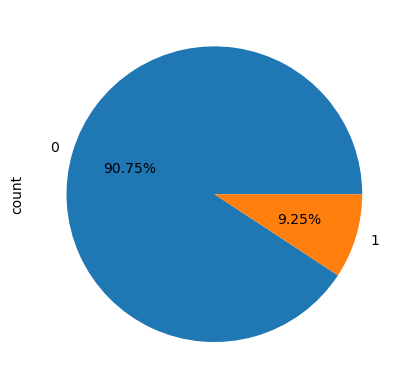

In [36]:
# Cek distribusi data
y_train.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

Berdasarkan pengecekan di atas, dapat dilihat bahwa data target tidak seimbang. Hal ini akan menyebabkan bias pada saat machine learning belajar dalam melakukan klasifikasi target. Oleh karena itu, saya akan melakukan balancing data. Pada case ini, saya memilih untuk melakukan balancing data dengan menggunakan teknik undersampling karena untuk efisiensi dalam proses komputasi, menghindari overfitting pada data yang disebabkan oleh oversampling karena berpotensi menghasilkan data sintetis yang tidak sepenuhnya mencerminkan pola asli dalam data dan membuat model terlalu hafal pada data sintetis sehingga tidak mampu untuk untuk memprediksi data yang lebih general.

In [37]:
# Undersampling
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((9986, 35), (9986,))

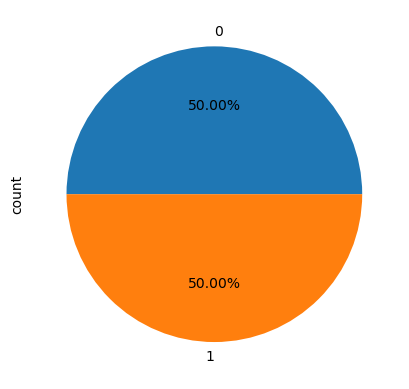

In [38]:
# Cek distribusi data after undersampling
y_train.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

Data sudah berhasil di balancing untuk class 0 dan class 1.

## 5.5. Check Distribution

Pada bagian ini saya akan mengecek distribusi kolom feature numerik.

In [39]:
def histogram_boxplot_grid(dataframe, columns=None, figsize=(16, 4), bins=20):
    """
    Display histogram and boxplot for each column in a grid format with n rows and 2 columns.

    Parameters:
    - dataframe: DataFrame containing the data
    - columns: List of column names to plot; if None, plots all numeric columns
    - figsize: Tuple specifying the size of the entire figure
    - bins: Number of bins for histograms
    """
    # If columns are not specified, use all numeric columns
    if columns is None:
        columns = dataframe.select_dtypes(include='number').columns.tolist()

    # Determine grid layout: n rows and 2 columns
    n = len(columns)
    rows = (n + 1) // 2  # Round up for odd numbers
    cols = 2  # Fixed number of columns

    # Create the overall figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()  # Flatten axes array for easier indexing

    for i, column in enumerate(columns):
        feature = dataframe[column].dropna()  # Drop missing values
        
        # Create a grid layout within each subplot
        gs = axes[i].get_gridspec()
        # Remove default axes
        axes[i].remove()
        
        # Create sub-grids for boxplot and histogram
        sub_gs = gs[i // cols, i % cols].subgridspec(2, 1, height_ratios=[0.25, 0.75])
        
        # Boxplot
        ax_box = fig.add_subplot(sub_gs[0])
        sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='yellow')
        ax_box.set(title=f'Boxplot and Histogram of {column}', xlabel='', yticks=[])
        
        # Histogram
        ax_hist = fig.add_subplot(sub_gs[1])
        sns.histplot(feature, bins=bins, kde=False, ax=ax_hist)
        ax_hist.axvline(np.mean(feature), color='green', linestyle='--', label='Mean')
        ax_hist.axvline(np.median(feature), color='blue', linestyle='-', label='Median')
        ax_hist.set(xlabel=column)
        ax_hist.legend()

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [40]:
def histogram_boxplot(dataframe, column=None, figsize=(8, 4), bins=20):
    """ 
    Boxplot and histogram combined for multiple columns in a DataFrame.
    
    Parameters:
    - dataframe: DataFrame containing the data
    - columns: List of column names to plot; if None, plots all numeric columns
    - figsize: Size of each figure (default (10, 5))
    - bins: Number of bins for the histogram (default 10)
    """
    feature = dataframe[column].dropna()  # Drop missing values for the column
    print(f"Plotting for column: {column}")  # Column name
    
    # Create subplots for each column
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  
                                            sharex=True,  
                                            gridspec_kw={"height_ratios": (.25, .75)}, 
                                            figsize=figsize)
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='yellow')
    sns.histplot(feature, ax=ax_hist2, bins=bins) 
    
    # Add mean and median
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--', label='Mean')
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-', label='Median')
    ax_hist2.legend()
    
    ax_box2.set(title=f"Boxplot and Histogram of {column}")
    plt.show()

In [41]:
def check_distribution(data, cols):
    """Fungsi ini digunakan untuk mengecek nilai skewness dan distribusi data. 

    Parameters
    ----------
    data
        dataframe
    cols
        kolom numerik

    Returns
    -------
        dataframe yang berisi nilai skewness dan kategori
    """
    
    skewness = [ data[col].skew() for col in cols ]

    category = []

    for skew in skewness:
        if skew > 1 or skew < -1:
            category.append('Highly Skewed')
        elif skew > 0.5 or skew < -0.5:
            category.append('Moderately Skewed')
        else:
            category.append('Normal')

    df_distribution = pd.DataFrame({'Column':cols,
                                    'Skewness':skewness,
                                    'Category':category})

    return df_distribution

In [42]:
check_distribution(X_train, col_num)

,Column,Skewness,Category
0,LoanAmount,0.284411,Normal
1,FundedAmount,0.647519,Moderately Skewed
2,FundedAmountInvestor,0.962457,Moderately Skewed
3,InterestRate,0.604386,Moderately Skewed
4,Income,2.099341,Highly Skewed
5,DebittoIncome,0.087399,Normal
6,Delinquency-twoyears,4.505645,Highly Skewed
7,Inquires-sixmonths,3.782066,Highly Skewed
8,OpenAccount,1.449147,Highly Skewed
9,PublicRecord,6.162704,Highly Skewed


Dari 21 kolom di atas, hampir semua kolom tidak terdistribusi secara normal. Data ini nantinya akan dibutuhkan saat handling outlier, apakah akan menggunakan IQR dengan fold 3, IQR dengan fold 1.5 atau gaussian dengan fold 3.

## 5.6. Check Outlier

Pada bagian ini saya akan mengecek apakah terdapat kolom outlier dan memutuskan apakah outlier tersebut akan di handling atau tidak.

In [43]:
def check_outlier(dataframe, col_num):
    """Fungsi ini digunakan untuk mengecek outlier pada dataframe.

    Parameters
    ----------
    dataframe
        dataframe yang digunakan
    col_num
        list yang berisi kolom numerik

    Returns
    -------
        dataframe yang berisi informasi outlier
    """

    z_threshold = 3
    iqr_multiplier = 1.5
    extreme_iqr_multiplier = 3
    id_outlier = []
    outlier_summary = []

    for col in col_num:
        # Hitung skewness untuk menentukan metode deteksi outlier
        col_skewness = stats.skew(dataframe[col].dropna())
        
        # Menentukan metode dan batasan (fence) berdasarkan skewness
        if abs(col_skewness) <= 0.5:
            distribution_type = 'Normal'
            mean_val = dataframe[col].mean()
            std_dev = dataframe[col].std()
            lower_boundary = mean_val - z_threshold * std_dev
            upper_boundary = mean_val + z_threshold * std_dev
            outliers = dataframe[(dataframe[col] < lower_boundary) | (dataframe[col] > upper_boundary)][col]
        
        elif 0.5 < abs(col_skewness) <= 1:
            distribution_type = 'Moderately Skewed'
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_boundary = Q1 - iqr_multiplier * IQR
            upper_boundary = Q3 + iqr_multiplier * IQR
            outliers = dataframe[(dataframe[col] < lower_boundary) | (dataframe[col] > upper_boundary)][col]
        
        elif abs(col_skewness) > 1:
            distribution_type = 'Highly Skewed'
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_boundary = Q1 - extreme_iqr_multiplier * IQR
            upper_boundary = Q3 + extreme_iqr_multiplier * IQR
            outliers = dataframe[(dataframe[col] < lower_boundary) | (dataframe[col] > upper_boundary)][col]
        
        # Menyimpan informasi outliers
        id_outlier.extend(outliers.index.values)
        outlier_count = outliers.count()
        outlier_percentage = (outlier_count / len(dataframe[col].dropna())) * 100
        outlier_summary.append({
            'Column': col,
            'DistributionType': distribution_type,
            'LowerBoundary': lower_boundary,
            'UpperBoundary': upper_boundary,
            'Num_Outlier': outlier_count,
            'PercentageOutlier(%)': round(outlier_percentage, 2)
        })

    # Mengonversi hasil ke dalam DataFrame
    outlier_df = pd.DataFrame(outlier_summary)
    return outlier_df, id_outlier

In [44]:
data, id = check_outlier(X_train, col_num)
data

,Column,DistributionType,LowerBoundary,UpperBoundary,Num_Outlier,PercentageOutlier(%)
0,LoanAmount,Normal,-8523.944350,42104.500328,0,0.00
1,FundedAmount,Moderately Skewed,-9324.000000,40618.000000,0,0.00
2,FundedAmountInvestor,Moderately Skewed,-3617.542676,32136.388746,258,2.58
3,InterestRate,Moderately Skewed,1.888772,21.665755,142,1.42
4,Income,Highly Skewed,-77591.334622,224181.157570,146,1.46
5,DebittoIncome,Normal,-1.997493,48.525464,0,0.00
6,Delinquency-twoyears,Highly Skewed,0.000000,0.000000,2371,23.74
7,Inquires-sixmonths,Highly Skewed,0.000000,0.000000,996,9.97
8,OpenAccount,Highly Skewed,-8.000000,34.000000,79,0.79
9,PublicRecord,Highly Skewed,0.000000,0.000000,708,7.09


Berdasarkan pengecekan outlier dengan menggunakan metode Z-Score dan Tukey's Fence, dari 21 kolom yang diperiksa terdapat 16 kolom yang memiliki outlier. Dari 16 feature yang memiliki outlier tersebut, saya akan mengecek feature mana saja yang perlu dilakukan handling outlier dan yang tidak perlu di handling.

### 5.6.1. Numerical Columns I

In [45]:
num_outlier_1 = ['Delinquency-twoyears', 'Inquires-sixmonths', 'PublicRecord', 'TotalReceivedLateFee', 'Recoveries', 'CollectionRecoveryFee', 'TotalCollectionAmount']

/var/folders/dy/lkw5b2g54j3_lglm04j9vrx80000gn/T/ipykernel_21794/4097912250.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


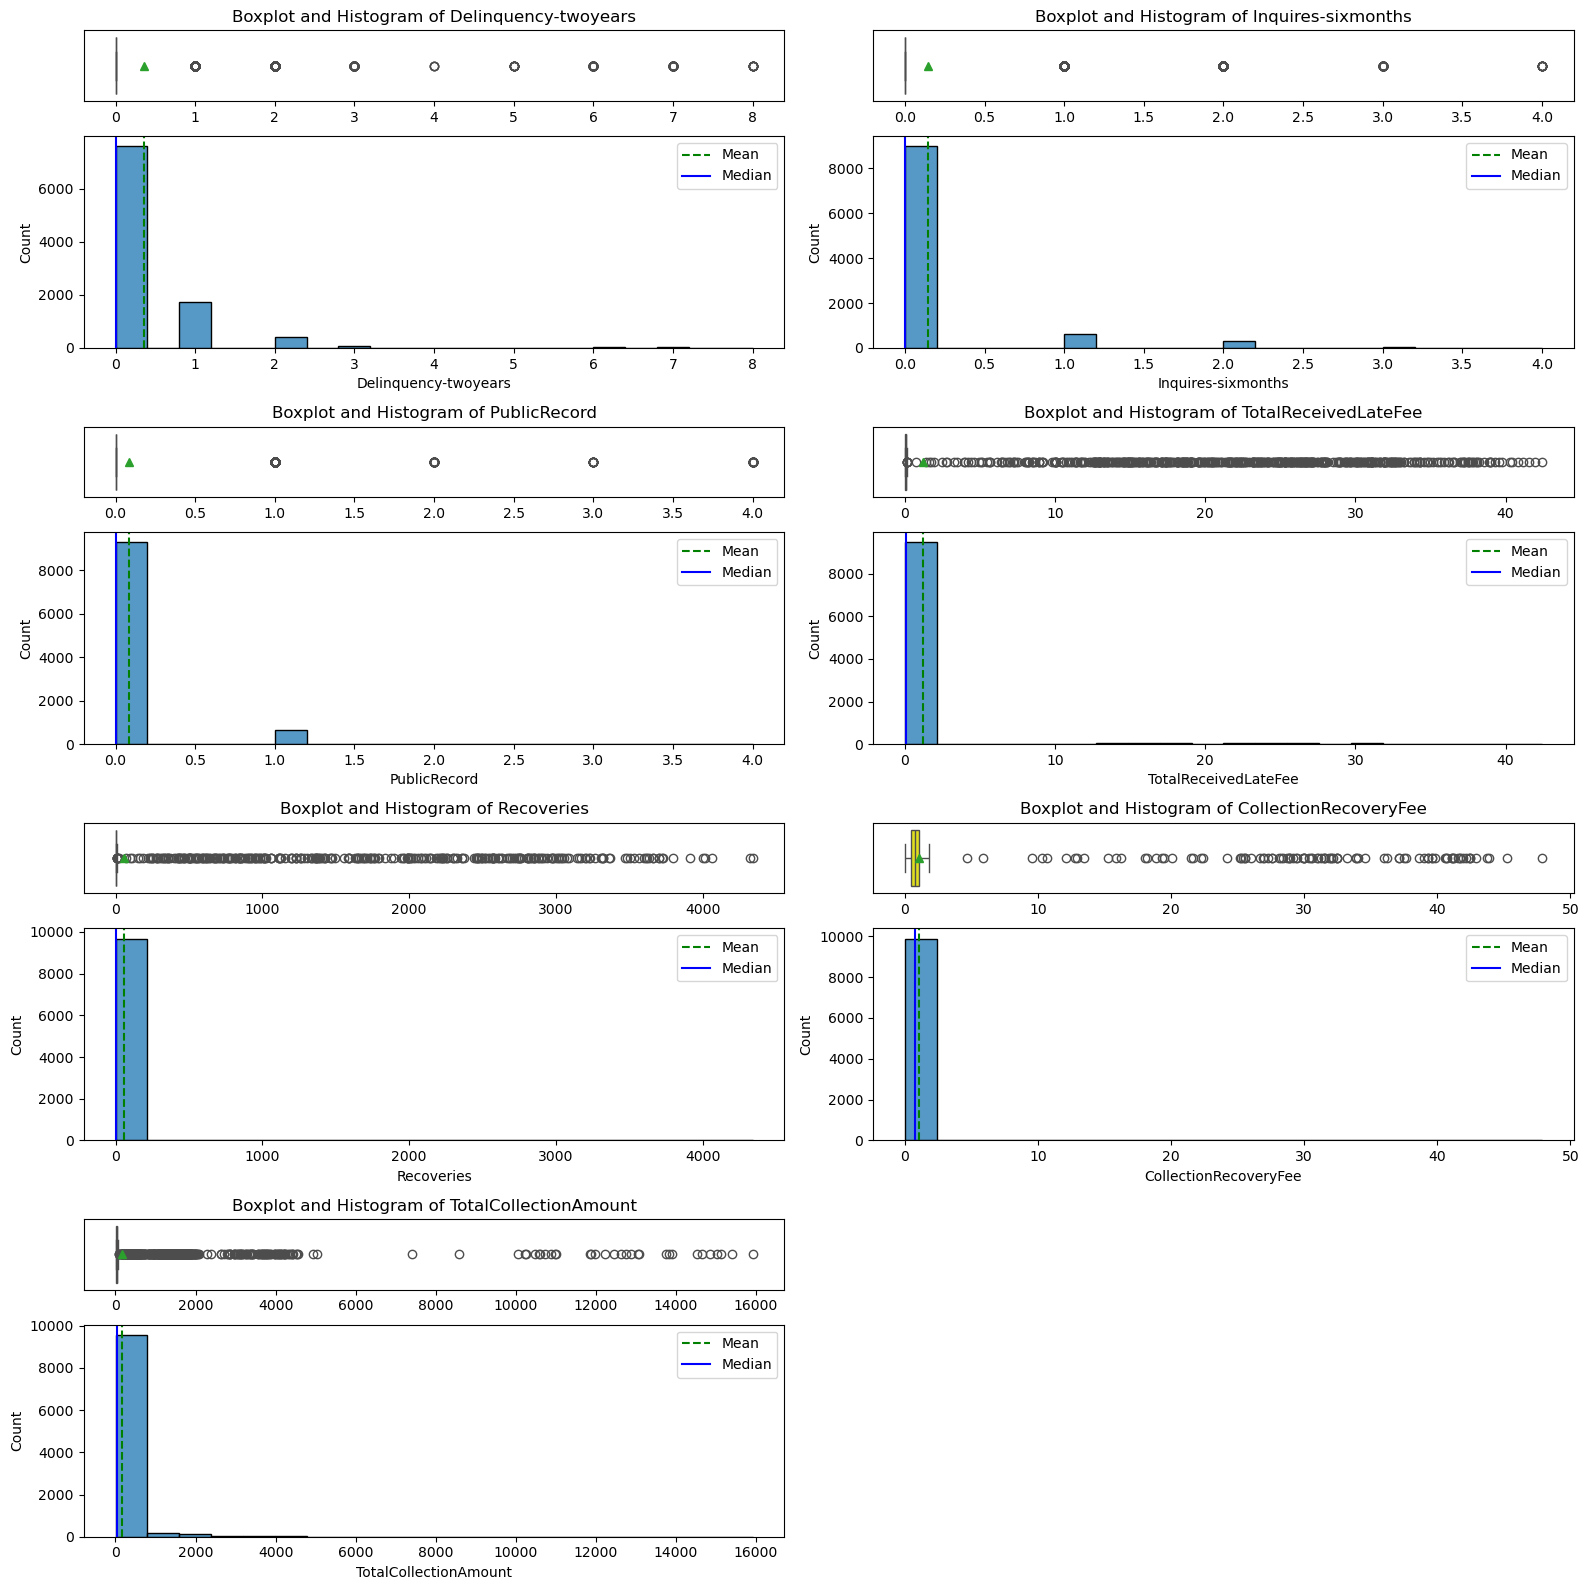

In [46]:
histogram_boxplot_grid(X_train, num_outlier_1, figsize=(16, 16))

Dari 7 kolom di atas, semua tidak akan dilakukan handling outlier karena alasan sebagai berikut.
- Kolom `Delinquency-twoyears` memberikan informasi mengenai jumlah keterlambatan pembayaran yang dilakukan oleh pengguna dalam 2 tahun terakhir. Apabila dilakukan capping, maka semua nilai akan berubah menjadi 0 yang mana ini berarti akan mengubah makna dari data tersebut. Efeknya adalah semua orang yang telat melakukan pembayaran akan dianggap tidak pernah telat melakukan pembayaran.
- Kolom `Inquires-sixmonths` memberikan informasi mengenai berapa kali seseorang melakukan pengajuan atau permintaan pinjaman. Apabila dilakukan capping, maka semua nilai akan berubah menjadi 0 yang mana ini berarti akan mengubah makna dari data tersebut. Efeknya adalah semua orang yang pernah mengajukan pinjaman akan dianggap tidak pernah mengajukan pinjaman.
- Kolom `PublicRecord` memberikan informasi mengenai berapa jumlah catatan negatif mengenai orang tersebut seperti penyitaan, bangkrut, dll. Apabila dilakukan capping, maka semua nilai akan berubah menjadi 0 yang mana ini berarti akan mengubah makna dari data tersebut. Efeknya adalah semua orang yang pernah memiliki catatan negatif akan dianggap tidak pernah memiliki catatan negatif.
- Kolom `TotalReceivedLateFee` memberikan informasi mengenai total biaya keterlambatan hingga saat data ini diambil. Apabila dilakukan capping, maka semua biaya keterlambatan akan berubah menjadi $0.22. Ini sama saja dengan menganggap bahwa tidak ada biaya keterlambatan yang dibayarkan ketika seseorang terlambat melakukan pembayaran. Selain itu, nilai varians aslinya sangat besar yaitu dari $0 - $42.61. Jika proses capping tetap dilakukan, hal ini akan menyebabkan model yang dimiliki tidak dapat mempelajari pola yang kompleks dari data asli dan berpotensi mengakibatkan prediksi yang kurang akurat.
- Kolom `Recoveries` memberikan informasi mengenai jumlah uang yang berhasil dipulihkan dari pinjaman yang sebelumnya telah dinyatakan sebagai tidak tertagih. Apabila dilakukan capping, maka semua uang yang berhasil dipulihkan akan berubah menjadi $16.92. Padahal nilai varians aslinya sangat besar yaitu dari $0 - $4354. Jika proses capping tetap dilakukan, hal ini akan menyebabkan model yang dimiliki tidak dapat mempelajari pola yang kompleks dari data asli dan berpotensi mengakibatkan prediksi yang kurang akurat.
- Kolom `CollectionRecoveryFee` memberikan informasi mengenai biaya yang dikenakan untuk proses pemulihan utang yang telah dinyatakan sebagai tidak tertagih. Apabila dilakukan capping, maka fee yang akan dikeluarkan oleh bank menjadi $2.86. Padahal nilai varians aslinya cukup besar yaitu dari $0 - 54.22. Jika proses capping tetap dilakukan, hal ini akan menyebabkan model yang dimiliki tidak dapat mempelajari pola yang kompleks dari data asli dan berpotensi mengakibatkan prediksi yang kurang akurat.
- Kolom `TotalCollectionAmount` memberikan informasi mengenai jumlah total saldo terutang dari semua akun yang sedang dalam proses penagihan. Apabila dilakukan capping, maka semua total saldo terutang akan berubah menjadi $112. Padahal nilai varians aslinya sangat besar yaitu dari $0 - $16421. Jika proses capping tetap dilakukan, hal ini akan menyebabkan model yang dimiliki tidak dapat mempelajari pola yang kompleks dari data asli dan berpotensi mengakibatkan prediksi yang kurang akurat.

### 5.6.2. Numerical Columns II

In [47]:
num_outlier_2 = ['FundedAmountInvestor', 'InterestRate', 'Income', 'OpenAccount', 'RevolvingBalance', 'TotalAccounts', 'TotalReceivedInterest', 'TotalCurrentBalance', 'TotalRevolvingCreditLimit']

/var/folders/dy/lkw5b2g54j3_lglm04j9vrx80000gn/T/ipykernel_21794/4097912250.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


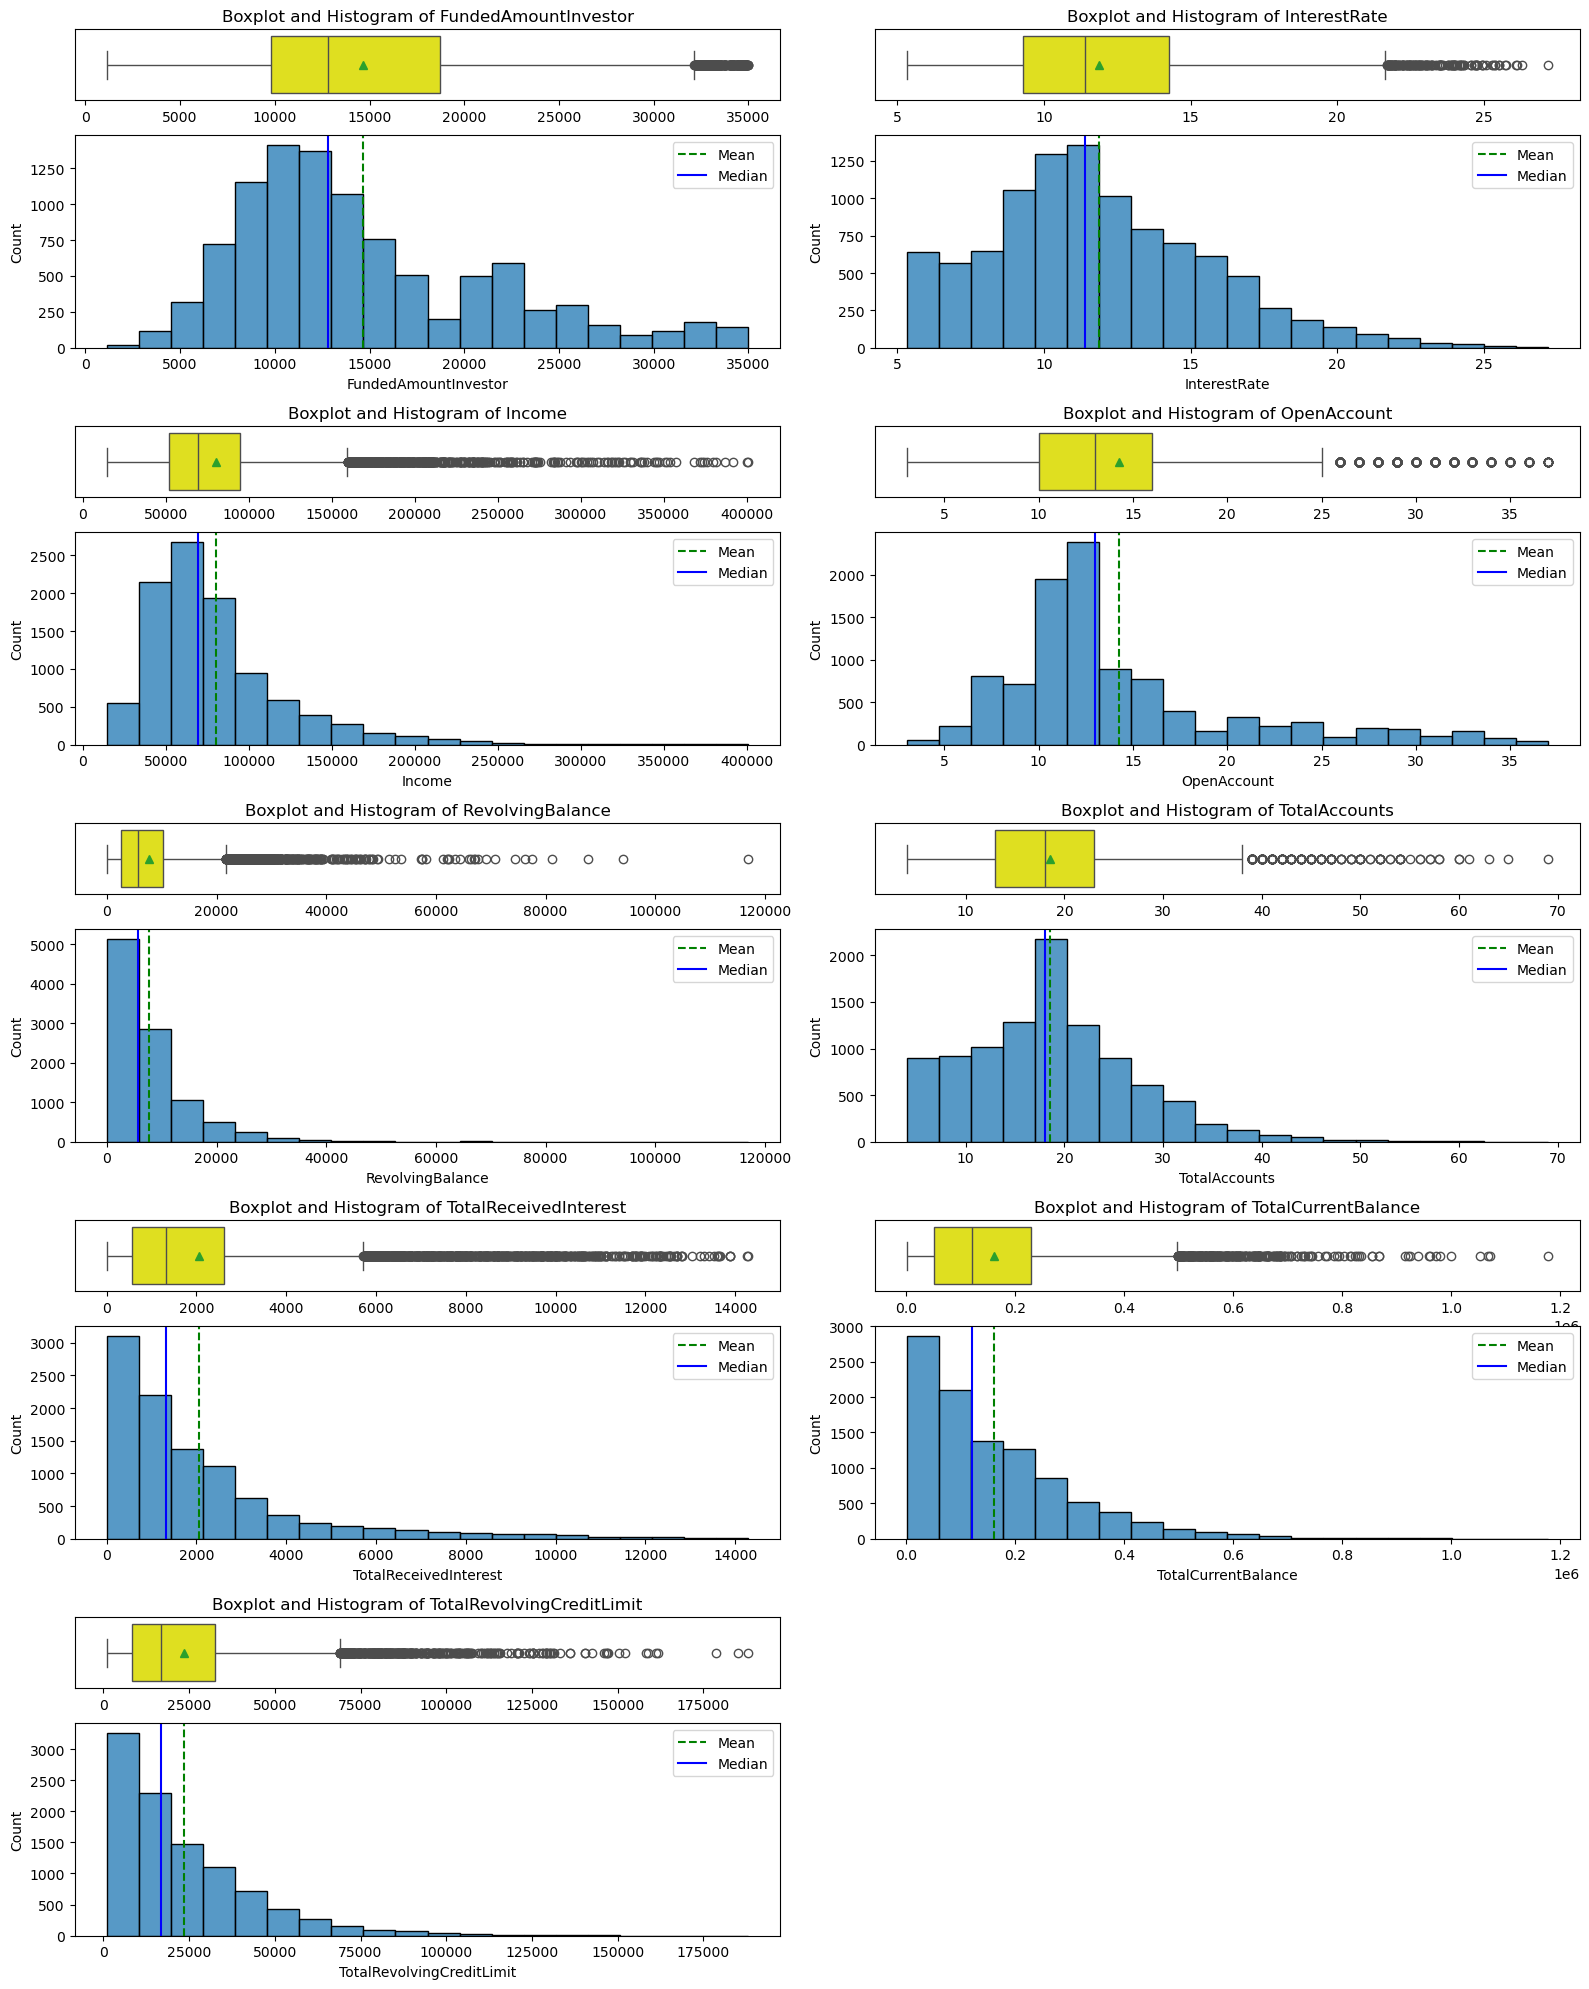

In [48]:
histogram_boxplot_grid(X_train, num_outlier_2, figsize=(16, 20))

Dari 9 kolom yang disebutkan, saya memutuskan untuk tidak melakukan handling outlier, seperti capping atau trimming, karena hal tersebut dapat mengurangi variabilitas (varians) dalam data. Varians yang tinggi sering kali mencerminkan keragaman data, yang penting bagi model machine learning untuk belajar dari pola-pola yang kompleks dan beragam. Dengan adanya varians tinggi, model memiliki kesempatan lebih baik untuk memahami hubungan mendalam antar fitur, terutama jika outlier mengandung informasi penting yang mewakili kejadian langka atau skenario spesifik dalam data.

Jika saya menerapkan capping pada nilai-nilai outlier ini, ada risiko besar kehilangan informasi kritis yang mungkin relevan bagi prediksi atau pengambilan keputusan. Sebagai contoh, outlier dapat mencerminkan kondisi ekstrem atau unik dalam data yang justru memberikan informasi berharga bagi model. Oleh karena itu, dengan membiarkan outlier tetap ada, saya ingin memastikan bahwa model dapat belajar sepenuhnya dari data yang tersedia, tanpa menghilangkan potensi kontribusi dari nilai-nilai yang berada di luar rentang normal.

## 5.7. Feature Selection

In [49]:
def check_correlation(data, target, col_numeric, col_categorical, skew_threshold=0.5, target_is_num=True, alpha=0.05):
    """Fungsi ini berguna untuk mengecek korelasi antara kolom feature dengan kolom target

    Parameters
    ----------
    data
        dataframe yang akan dicek
    target
        kolom target
    col_numeric
        list yang berisi kolom numerik
    col_categorical
        list yang berisi kolom kategorikal
    skew_threshold, optional
        nilai skew sebagai pemisah apakah akan menggunakan spearman atau pearson, by default 0.5
    target_is_num, optional
        apakah kolom target numerik atau kategorikal, by default True
    alpha, optional
        nilai alpha, by default 0.05

    Returns
    -------
        dataframe yang berisi metode korelasi yang digunakan, nilai korelasi, nilai p_value, dan apakah ada atau tidak ada korelasi
    """
    correlation_results = {}

    # Check if target is numeric or categorical
    target_is_numeric = target_is_num
    target_is_categorical = not target_is_numeric

    # Loop through each feature
    for col in data.columns:

        # Determine if the column is numeric or categorical
        feature_is_numeric = col in col_numeric
        feature_is_categorical = col in col_categorical

        # Spearman or Pearson for numeric-numeric features
        if feature_is_numeric and target_is_numeric:
            # Calculate skewness of both feature and target
            feature_skew = abs(stats.skew(data[col]))
            target_skew = abs(stats.skew(target))

            # Choose Spearman if either is not normally distributed
            if feature_skew > skew_threshold or target_skew > skew_threshold:
                corr, p_value = stats.spearmanr(data[col], target)
                correlation_results[col] = {'method': 'Spearman', 'correlation': corr, 'p_value': p_value, 'korelasi': 'Ada Korelasi' if p_value < alpha else 'Tidak Ada Korelasi'}
            else:
                # Use Pearson for normally distributed numeric features and target
                corr, p_value = stats.pearsonr(data[col], target)
                correlation_results[col] = {'method': 'Pearson', 'correlation': corr, 'p_value': p_value, 'korelasi': 'Ada Korelasi' if p_value < alpha else 'Tidak Ada Korelasi'}

        # Kendall Tau for numeric-categorical or categorical-numeric features
        elif (feature_is_numeric and target_is_categorical) or (feature_is_categorical and target_is_numeric):
            corr, p_value = stats.kendalltau(data[col], target)
            correlation_results[col] = {'method': 'Kendall Tau', 'correlation': corr, 'p_value': p_value, 'korelasi': 'Ada Korelasi' if p_value < alpha else 'Tidak Ada Korelasi'}

        # Chi-squared for categorical-categorical features
        elif feature_is_categorical and target_is_categorical:
            contingency_table = pd.crosstab(data[col], target)
            _, p_value, _, _ = stats.chi2_contingency(contingency_table)
            cramers_v = cramers_V(contingency_table)
            correlation_results[col] = {'method': 'Chi-squared', 'correlation': cramers_v, 'p_value': p_value, 'korelasi': 'Ada Korelasi' if p_value < alpha else 'Tidak Ada Korelasi'}

    return pd.DataFrame(correlation_results).T


def cramers_V(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    
    if n == 0:
        return np.nan  # or return 0, depending on your preference
    
    phi2 = chi2 / n
    r, k = contingency_table.shape
    
    if n == 1 or r == 1 or k == 1:
        return 0  # or np.nan, depending on your preference
    
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    
    if min((kcorr - 1), (rcorr - 1)) <= 0:
        return np.nan  # or return 0, depending on your preference
    
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

Sebelum melakukan pengecekan korelasi, saya akan merumuskan H0 dan H1 secara umum sebagai berikut. <br>
H0: Tidak ada korelasi antara kolom feature dengan target <br>
H1: Ada korelasi antara kolom feature dengan kolom target

In [50]:
# Check correlation
result = check_correlation(X_train, y_train, col_num, col_cat, target_is_num=False)
result

,method,correlation,p_value,korelasi
LoanAmount,Kendall Tau,-0.009325,0.253791,Tidak Ada Korelasi
FundedAmount,Kendall Tau,-0.008042,0.32506,Tidak Ada Korelasi
FundedAmountInvestor,Kendall Tau,-0.005679,0.487101,Tidak Ada Korelasi
Term,Chi-squared,0.023917,0.021155,Ada Korelasi
BatchEnrolled,Chi-squared,0.0,0.671999,Tidak Ada Korelasi
InterestRate,Kendall Tau,-0.003085,0.705754,Tidak Ada Korelasi
Grade,Chi-squared,0.029971,0.020492,Ada Korelasi
SubGrade,Chi-squared,0.036634,0.063111,Tidak Ada Korelasi
HomeOwnership,Chi-squared,0.032139,0.002119,Ada Korelasi
Income,Kendall Tau,0.006309,0.440044,Tidak Ada Korelasi


Dari hasil pengecekan cek korelasi di atas, tidak semua fitur memiliki nilai p_value < 0.05 sehingga hanya ada 7 fitur yang berhasil menolak H0 dan H1 diterima yang mengindikasikan bahwa terdapat korelasi yang signifikan secara statistik antara 7 kolom feature tersebut dengan kolom target.

In [51]:
# Filter only features with korelasi
X_train[result[result['korelasi'] == 'Ada Korelasi'].index]

,Term,Grade,HomeOwnership,OpenAccount,RevolvingUtilities,InitialListStatus,TotalReceivedLateFee,CollectionRecoveryFee,TotalCollectionAmount,TotalCurrentBalance
1620,59,B,MORTGAGE,9,44.537878,f,0.061447,0.745316,40,7967
16152,58,E,RENT,17,22.550104,f,0.081214,0.345254,46,241263
26553,58,E,MORTGAGE,31,63.111005,w,0.106205,1.085813,59,25685
28578,59,B,RENT,12,67.971538,f,0.016598,1.442485,47,73852
57166,59,B,RENT,8,40.253645,w,0.026902,0.413633,26,300255
...,...,...,...,...,...,...,...,...,...,...
3226,59,A,RENT,28,61.378283,f,0.017456,1.093953,41,199759
6753,58,G,MORTGAGE,9,48.756966,w,0.010813,1.213980,17,44842
37956,59,D,RENT,24,45.719598,w,0.092279,0.584235,305,313015
16867,58,A,RENT,8,68.364319,f,0.083190,1.069223,16,149817


Berdasarkan hasil uji korelasi secara statistik, hanya ada 7 kolom yang berpengaruh signifikan secara statistik terhadap target yaitu kolom `Term`, `HomeOwnership`, `OpenAccount`, `InitialListStatus`, `CollectionRecoveryFee`, `TotalCollectionAmount`, dan `TotalCurrentBalance`. Kelima kolom tersebut akan dipisahkan berdasarkan kolom kategorikal dan numerik. Semua kolom kategorikal disini adalah kategorikal nominal sehingga akan di encode menggunakan onehot encoder. Sedangkan kolom numerik akan di scaling menggunakan MinMax Scaler karena terdapat outlier pada data yang mana MinMax Scaler cocok digunakan ketika datanya memiliki outlier.

In [52]:
# column numerical
final_col_num = [col for col in col_num if col in result[result['korelasi'] == 'Ada Korelasi'].index]
final_col_num

['OpenAccount',
 'RevolvingUtilities',
 'TotalReceivedLateFee',
 'CollectionRecoveryFee',
 'TotalCollectionAmount',
 'TotalCurrentBalance']

Terdapat 4 kolom numerik yang memiliki korelasi signifikan yang nantinya akan dilakukan scaling agar nilainya berada pada rentang yang seragam untuk menghindari bias pada model. Scaler yang dipilih adalah MinMax Scaler karena banyak data yang memiliki outlier dan scaler tidak terpengaruh oleh outlier.

In [53]:
# column categorical nominal
final_col_cat_ohe = [col for col in col_cat if col in result[result['korelasi'] == 'Ada Korelasi'].index]
final_col_cat_ohe

['Grade', 'HomeOwnership', 'InitialListStatus', 'Term']

Terdapat 3 kolom kategorikal yang memiliki korelasi signifikan yang nantinya akan encoding untuk dapat diproses oleh model karena model tidak dapat memproses tipe data string/object. Encoder yang akan digunakan adalah One Hot Encoder karena kolom kategorikal ini tidak memiliki tingkatan atau orde.

In [54]:
# Data train
X_train = X_train[final_col_num + final_col_cat_ohe]
X_test = X_test[final_col_num + final_col_cat_ohe]

## 5.8. Encoding dan Scaling Menggunakan Pipeline

Pada bagian ini saya akan melakukan scaling dan encoding menggunakan pipeline. Sesuai dengan yang saya jabarkan sebelumnya, scaler yang digunakan adalah MinMax Scaler dan encoding yang digunakan adalah One Hot Encoder.

In [55]:
transformer = ColumnTransformer([
('scaler', MinMaxScaler(), final_col_num),
('encoder_ohe', OneHotEncoder(), final_col_cat_ohe),
])
transformer

ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                 ['OpenAccount', 'RevolvingUtilities',
                                  'TotalReceivedLateFee',
                                  'CollectionRecoveryFee',
                                  'TotalCollectionAmount',
                                  'TotalCurrentBalance']),
                                ('encoder_ohe', OneHotEncoder(),
                                 ['Grade', 'HomeOwnership', 'InitialListStatus',
                                  'Term'])])

# 6. Model Definition

Pada bagian ini saya akan mendefinisikan model yang akan digunakan. Algoritma yang akan saya gunakan adalah sebagai berikut.
- K Neighbors Classifier (KNN)
- Support Vector Classifier (SVM)
- Decision Tree Classifier
- Random Forest Classifier
- XGB Classifier (XGBoost)

Saya akan membandingkan algoritma mana yang paling stabil dan memberikan hasil yang paling baik yang dapat dilihat dari nilai score cross validation. Score terbaik adalah algoritma yang memberikan hasil rata-rata tertinggi dengan standar deviasi yang rendah. Hasil rata-rata yang tinggi berarti model mampu memprediksi dengan baik. Sedangkan standar deviasi yang rendah mengindikasikan bahwa model stabil karena memberikan hasil yang mirip untuk sekian kali percobaan.

Metrics yang akan saya gunakan adalah recall score karena saya ingin meminimalkan False Negatif (FN) pada model yang diberikan. FN perlu dihindari karena situasi FN adalah situasi yang paling tidak diinginkan oleh perbankan. FN disini berarti perbankan memprediksi bahwa nasabah adalah Non Defaulter (tidak gagal bayar) namun ternyata nasabah tersebut adalah Defaulter (gagal bayar). Ketika nasabah mengalami gagal bayar maka bank akan menerima kerugian.

## 6.1. K Neighbors Classifier (KNN)

In [2405]:
# Making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

## 6.2. Support Vector Classifier (SVM)

In [2406]:
# Making pipeline for SVC
pipe_svc = Pipeline([
('transformer', transformer),
('classifier', SVC(random_state=random_state))
])

## 6.3. Decision Tree Classifier

In [2407]:
# Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier(random_state=random_state))
])

## 6.4. Random Forest Classifier

In [2408]:
# Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier(random_state=random_state))
])

## 6.5. XGB Classifier

In [2409]:
# Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier(random_state=random_state))
])

# 7. Model Training

Pada bagian ini saya akan melakukan training model menggunakan keenam algoritma di atas.

## 7.1. K Neighbors Classifier (KNN)

In [2410]:
# KNN
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['OpenAccount',
                                                   'CollectionRecoveryFee',
                                                   'TotalCollectionAmount',
                                                   'TotalCurrentBalance']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['HomeOwnership',
                                                   'InitialListStatus',
                                                   'Term'])])),
                ('classifier', KNeighborsClassifier())])

## 7.2. Support Vector Classifier (SVM)

In [2411]:
# # SVC
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['OpenAccount',
                                                   'CollectionRecoveryFee',
                                                   'TotalCollectionAmount',
                                                   'TotalCurrentBalance']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['HomeOwnership',
                                                   'InitialListStatus',
                                                   'Term'])])),
                ('classifier', SVC(random_state=20))])

## 7.3. Decision Tree Classifier

In [2412]:
# Decision Tree
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['OpenAccount',
                                                   'CollectionRecoveryFee',
                                                   'TotalCollectionAmount',
                                                   'TotalCurrentBalance']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['HomeOwnership',
                                                   'InitialListStatus',
                                                   'Term'])])),
                ('classifier', DecisionTreeClassifier(random_state=20))])

## 7.4. Random Forest Classifier

In [2413]:
# Random Forest
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['OpenAccount',
                                                   'CollectionRecoveryFee',
                                                   'TotalCollectionAmount',
                                                   'TotalCurrentBalance']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['HomeOwnership',
                                                   'InitialListStatus',
                                                   'Term'])])),
                ('classifier', RandomForestClassifier(random_state=20))])

## 7.5. XGB Classifier

In [2414]:
# XGBoost
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['OpenAccount',
                                                   'CollectionRecoveryFee',
                                                   'TotalCollectionAmount',
                                                   'TotalCurrentBalance']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['HomeOwnership',
                                                   'InitialListStatus',
                                                   'Term'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=20, ...))])

# 8. Model Evaluation

Model akan dievaluasi dengan menggunakan metrics **recall**. Metrics ini dipilih karena saya ingin meminimalkan False Negatif (FN) pada model yang diberikan. FN perlu dihindari karena situasi FN adalah situasi yang paling tidak diinginkan oleh perbankan. FN disini berarti perbankan memprediksi bahwa nasabah adalah Non Defaulter (tidak gagal bayar) namun ternyata nasabah tersebut adalah Defaulter (gagal bayar). Ketika nasabah mengalami gagal bayar maka bank akan menerima kerugian.

Oleh karena itu, dengan meminimalkan FN, bank dapat mengurangi risiko memberikan pinjaman kepada nasabah yang memiliki kemungkinan tinggi untuk gagal bayar. Hal ini penting untuk menjaga stabilitas keuangan bank, memitigasi risiko kredit macet, dan memastikan keberlanjutan operasional perusahaan dalam jangka panjang. Memprioritaskan recall sebagai metrik utama memungkinkan model lebih fokus pada mendeteksi sebanyak mungkin nasabah yang berpotensi gagal bayar, meskipun hal ini mungkin menyebabkan sedikit peningkatan False Positif (FP).

## 8.1. Base Model Evaluation

Pada bagian ini saya akan mengevaluasi base model yang telah di training sebelumnya dengan menggunakan dataset test.

In [2415]:
def evaluate_model(model, modelname, X_train, y_train, X_test, y_test):
    """
    Evaluates a classification model on training and testing datasets.
    
    Parameters:
    - model: The trained model to evaluate.
    - modelname: A string representing the name of the model.
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    
    Returns:
    - model_scores: A DataFrame containing evaluation metrics for the model.
    - train_curve: A DataFrame for ROC curve data (training set) or None if unsupported.
    - test_curve: A DataFrame for ROC curve data (testing set) or None if unsupported.
    """
    # Perform predictions on training and testing sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate recall scores for training and testing sets
    score_train = classification_report(y_train, y_pred_train, zero_division=0, output_dict=True)['1']['recall']
    score_test = classification_report(y_test, y_pred_test, zero_division=0, output_dict=True)['1']['recall']

    # Perform cross-validation for recall scores
    cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

    # Initialize variables for AUC and ROC curve
    auc_train, auc_test = None, None
    train_curve, test_curve = None, None

    # Check if the model supports predict_proba
    if hasattr(model, 'predict_proba'):
        # Calculate predicted probabilities for AUC and ROC curve
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
        auc_train = roc_auc_score(y_train, y_train_pred_proba)

        y_test_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
        auc_test = roc_auc_score(y_test, y_test_pred_proba)

        # Create DataFrames for ROC curve data
        train_curve = pd.DataFrame({'FPR': fpr_train, 'TPR': tpr_train})
        test_curve = pd.DataFrame({'FPR': fpr_test, 'TPR': tpr_test})

    # Compile evaluation metrics into a DataFrame
    model_scores = pd.DataFrame({
        'Model': [modelname],
        'Train Recall': [score_train],
        'Test Recall': [score_test],
        'CV Recall Mean': [cross_val.mean()],
        'CV Recall Std': [cross_val.std()],
        'CV Recall Range': [[round(cross_val.mean() - cross_val.std(), 4),
                             round(cross_val.mean() + cross_val.std(), 4)]],
        'AUC Score Train': [auc_train],
        'AUC Score Test': [auc_test]
    })

    # Return the results
    return model_scores, train_curve, test_curve

### 8.1.1. K Neighbor Classifier (KNN)

In [2416]:
# Cek score recall
knn_score, knn_train_curve, knn_test_curve = evaluate_model(pipe_knn, 'KNN Classifier', X_train, y_train, X_test, y_test)
knn_score

,Model,Train Recall,Test Recall,CV Recall Mean,CV Recall Std,CV Recall Range,AUC Score Train,AUC Score Test
0,KNN Classifier,0.691969,0.500801,0.504706,0.006969,"[0.4977, 0.5117]",0.748313,0.506285


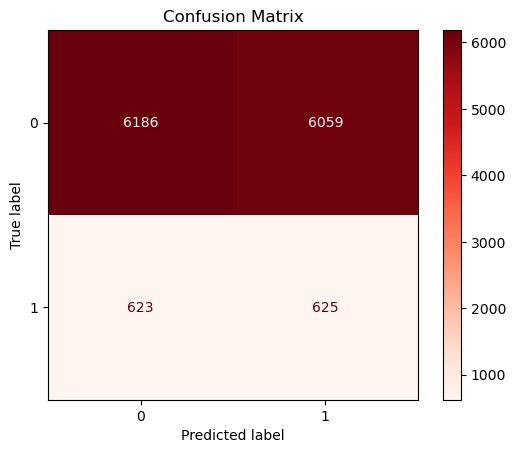

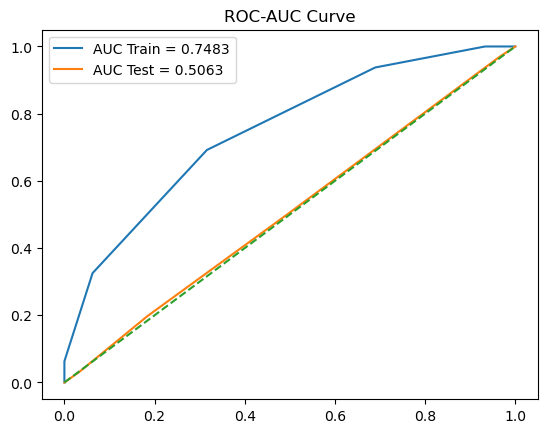

In [2417]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipe_knn, X_test, y_test, cmap='Reds')
plt.title('Confusion Matrix')

# Plot ROC-AUC Curve
plt.figure(0).clf()
plt.plot(knn_train_curve['FPR'], knn_train_curve['TPR'], label=f"AUC Train = {knn_score['AUC Score Train'][0]:.4f}")
plt.plot(knn_test_curve['FPR'], knn_test_curve['TPR'], label=f"AUC Test = {knn_score['AUC Score Test'][0]:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC-AUC Curve')
plt.legend(loc=0)
plt.show()

Hasil evaluasi model KNN menunjukkan performa yang kurang optimal dalam menangani data. Nilai standar deviasi (0.007) menunjukkan konsistensi hasil namun score Recall Mean (0.504) yang diperoleh cukup rendah. Train Recall (0.692) lebih tinggi dibandingkan Test Recall (0.504) mengindikasikan kemungkinan overfitting. AUC Score juga memperlihatkan perbedaan signifikan antara data train (0.692) dan test (0.504) yang mengindikasikan kemampuan klasifikasi model pada data test tidak memadai.

Model KNN tidak cukup efektif dalam menangkap pola kelas positif pada data uji. Hal ini dapat disebabkan karena model yang digunakan hanya menggunakan default parameter sehingga perlu melakukan tuning parameter untuk mendapatkan hasil yang lebih baik. Selain itu, dataset ini memiliki outlier yang mana algoritma KNN ini sensitif terhadap outlier karena menggunakan jarak dalam proses perhitungannya sehingga algoritma ini memang tidak cocok digunakan untuk dataset yang dimiliki. 

### 8.1.2. Support Vector Classifier (SVM)

In [2418]:
# Cek score recall
svc_score, svc_train_curve, svc_test_curve = evaluate_model(pipe_svc, 'SVC', X_train, y_train, X_test, y_test)
svc_score

,Model,Train Recall,Test Recall,CV Recall Mean,CV Recall Std,CV Recall Range,AUC Score Train,AUC Score Test
0,SVC,0.611456,0.59375,0.587612,0.029646,"[0.558, 0.6173]",None,None


Text(0.5, 1.0, 'Confusion Matrix')

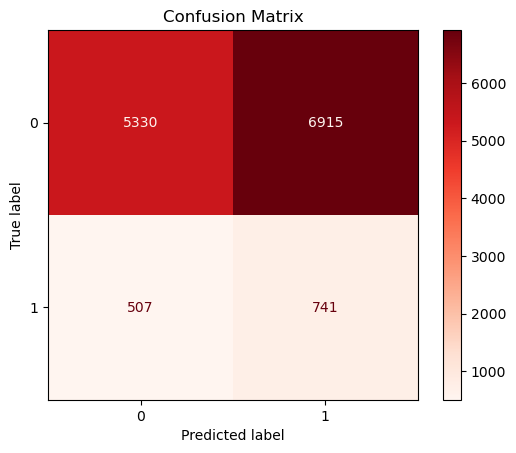

In [2419]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, cmap='Reds')
plt.title('Confusion Matrix')

Hasil evaluasi model SVC menunjukkan performa yang kurang optimal dalam menangani data. Nilai standar deviasi (0.029) menunjukkan konsistensi hasil namun score Recall Mean (0.587) yang diperoleh cukup rendah. Train Recall (0.611) relatif sama dengan Test Recall (0.593) mengindikasikan bahwa model sudah good-fit.

Meskipun model SVC menunjukkan hasil yang konsisten dan good-fit, performa secara keseluruhan masih rendah seperti terlihat dari Recall Mean (0.587). Hal ini menunjukkan bahwa model kurang mampu menangkap pola untuk kelas positif secara efektif. Hal ini dapat disebabkan karena model yang digunakan hanya menggunakan default parameter sehingga perlu melakukan tuning parameter untuk mendapatkan hasil yang lebih baik.

### 8.1.3. Decision Tree Classifier

In [2420]:
# Cek score recall
dt_score, dt_train_curve, dt_test_curve = evaluate_model(pipe_dt, 'Decision Tree', X_train, y_train, X_test, y_test)
dt_score

,Model,Train Recall,Test Recall,CV Recall Mean,CV Recall Std,CV Recall Range,AUC Score Train,AUC Score Test
0,Decision Tree,1.0,0.525641,0.495694,0.010832,"[0.4849, 0.5065]",1.0,0.521089


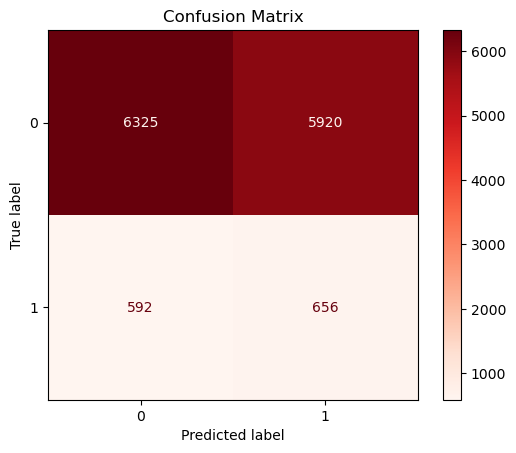

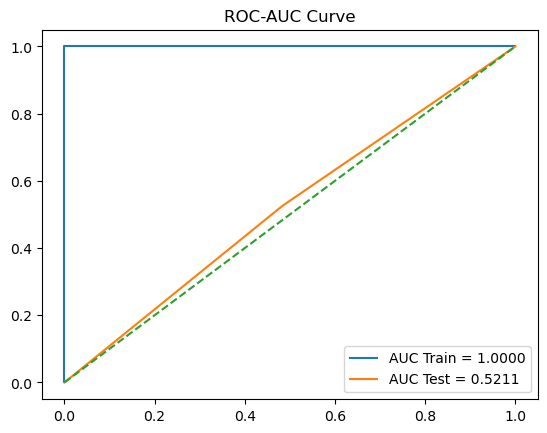

In [2421]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipe_dt, X_test, y_test, cmap='Reds')
plt.title('Confusion Matrix')

# Plot ROC-AUC Curve
plt.figure(0).clf()
plt.plot(dt_train_curve['FPR'], dt_train_curve['TPR'], label=f"AUC Train = {dt_score['AUC Score Train'][0]:.4f}")
plt.plot(dt_test_curve['FPR'], dt_test_curve['TPR'], label=f"AUC Test = {dt_score['AUC Score Test'][0]:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC-AUC Curve')
plt.legend(loc=0)
plt.show()

Hasil evaluasi model Decision Tree menunjukkan performa yang kurang optimal dalam menangani data. Nilai standar deviasi (0.011) menunjukkan konsistensi hasil namun score Recall Mean (0.495) yang diperoleh cukup rendah. Train Recall (1) jauh lebih tinggi dibandingkan Test Recall (0.525) mengindikasikan overfitting. AUC Score juga memperlihatkan perbedaan signifikan antara data train (0.944) dan test (0.498) yang mengindikasikan kemampuan klasifikasi model pada data test tidak memadai.

Model Decision Tree ataupun model dengan Tree-based lainnya cenderung mengalami overfitting apalagi dengan default parameter yang diberikan. Salah satu langkah yang bisa dilakukan untuk mengoptimalkan algoritma decision tree adalah dengan cara melakukan regularisasi pada saat tuning hyperparameter untuk mengurangi kompleksitas model dan diharapkan model dapat menangkap pola secara umum.

### 8.1.4. Random Forest Classifier

In [2422]:
# Cek score recall
rf_score, rf_train_curve, rf_test_curve = evaluate_model(pipe_rf, 'Random Forest', X_train, y_train, X_test, y_test)
rf_score

,Model,Train Recall,Test Recall,CV Recall Mean,CV Recall Std,CV Recall Range,AUC Score Train,AUC Score Test
0,Random Forest,1.0,0.475962,0.488886,0.010408,"[0.4785, 0.4993]",1.0,0.499871


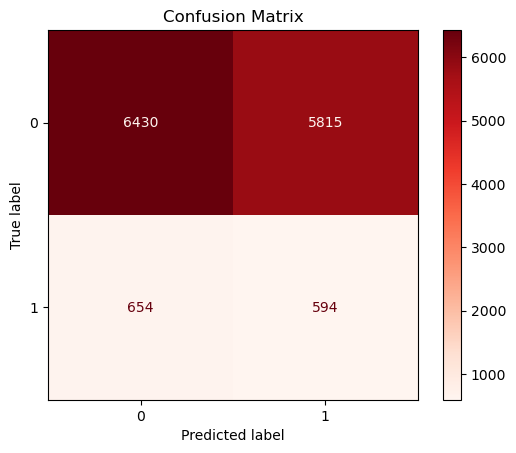

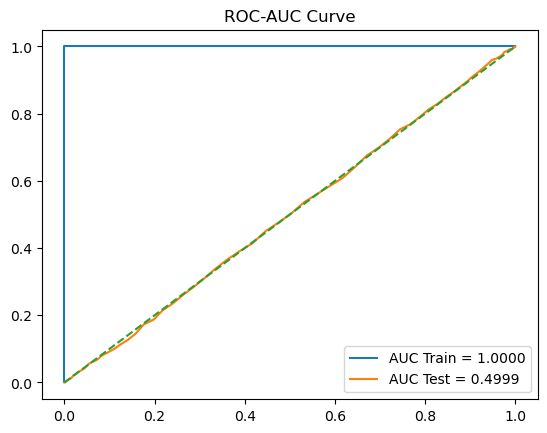

In [2423]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test, cmap='Reds')
plt.title('Confusion Matrix')

# Plot ROC-AUC Curve
plt.figure(0).clf()
plt.plot(rf_train_curve['FPR'], rf_train_curve['TPR'], label=f"AUC Train = {rf_score['AUC Score Train'][0]:.4f}")
plt.plot(rf_test_curve['FPR'], rf_test_curve['TPR'], label=f"AUC Test = {rf_score['AUC Score Test'][0]:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC-AUC Curve')
plt.legend(loc=0)
plt.show()

Hasil evaluasi model Random Forest menunjukkan performa yang kurang optimal dalam menangani data. Nilai standar deviasi (0.010) menunjukkan konsistensi hasil namun score Recall Mean (0.489) yang diperoleh cukup rendah. Train Recall (1) jauh lebih tinggi dibandingkan Test Recall (0.475) mengindikasikan kemungkinan overfitting. AUC Score juga memperlihatkan perbedaan signifikan antara data train (1) dan test (0.499) yang mengindikasikan kemampuan klasifikasi model pada data test tidak memadai.

Model Random Forest ataupun model dengan Tree-based lainnya cenderung mengalami overfitting apalagi dengan default parameter yang diberikan. Salah satu langkah yang bisa dilakukan untuk mengoptimalkan algoritma random forest adalah dengan cara melakukan regularisasi pada saat tuning hyperparameter untuk mengurangi kompleksitas model dan diharapkan model dapat menangkap pola secara umum.

### 8.1.5. XGB Classifier (XGBoost)

In [2424]:
# Cek score recall
xgb_score, xgb_train_curve, xgb_test_curve = evaluate_model(pipe_xgb, 'XGB Classifier', X_train, y_train, X_test, y_test)
xgb_score

,Model,Train Recall,Test Recall,CV Recall Mean,CV Recall Std,CV Recall Range,AUC Score Train,AUC Score Test
0,XGB Classifier,0.850791,0.496795,0.508315,0.024733,"[0.4836, 0.533]",0.929963,0.500795


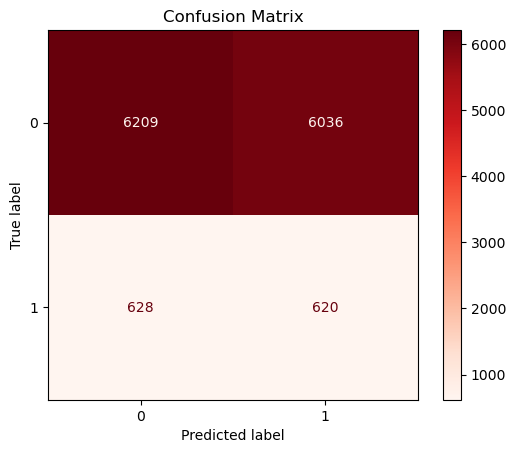

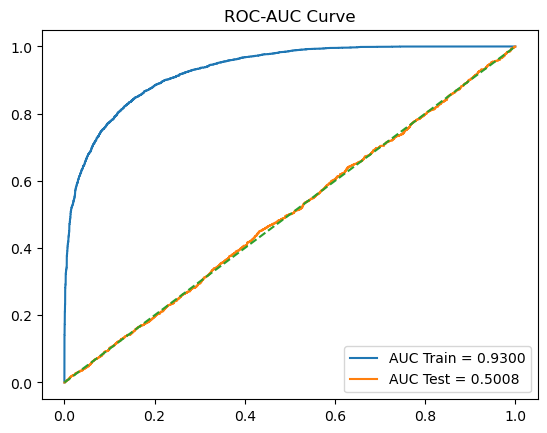

In [2425]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipe_xgb, X_test, y_test, cmap='Reds')
plt.title('Confusion Matrix')

# Plot ROC-AUC Curve
plt.figure(0).clf()
plt.plot(xgb_train_curve['FPR'], xgb_train_curve['TPR'], label=f"AUC Train = {xgb_score['AUC Score Train'][0]:.4f}")
plt.plot(xgb_test_curve['FPR'], xgb_test_curve['TPR'], label=f"AUC Test = {xgb_score['AUC Score Test'][0]:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC-AUC Curve')
plt.legend(loc=0)
plt.show()

Hasil evaluasi model XGBoost menunjukkan performa yang kurang optimal dalam menangani data. Nilai standar deviasi (0.024) menunjukkan konsistensi hasil namun score Recall Mean (0.508) yang diperoleh cukup rendah. Train Recall (0.851) jauh lebih tinggi dibandingkan Test Recall (0.496) mengindikasikan kemungkinan overfitting. AUC Score juga memperlihatkan perbedaan yang cukup jauh antara data train (0.929) dan test (0.500) yang mengindikasikan kemampuan klasifikasi model pada data test tidak memadai.

Model XGB tidak cukup efektif dalam menangkap pola kelas positif pada data test. Hal ini dapat disebabkan karena model yang digunakan hanya menggunakan default parameter sehingga perlu melakukan tuning parameter untuk mendapatkan hasil yang lebih baik.

## 8.2. Find Best Model

Pada bagian ini saya akan membandingkan data score yang sudah diperoleh untuk kelima model. Secara umum, model yang akan dipilih adalah model yang stabil (nilai standar deviasi rendah), nilai metrics yang tinggi, dan perbedaan score antara train set dan test set tidak terlalu jauh.

In [2426]:
compare = knn_score._append(svc_score)._append(dt_score)._append(rf_score)._append(xgb_score).reset_index(drop=True)
compare

/var/folders/dy/lkw5b2g54j3_lglm04j9vrx80000gn/T/ipykernel_25849/1882342350.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compare = knn_score._append(svc_score)._append(dt_score)._append(rf_score)._append(xgb_score).reset_index(drop=True)


,Model,Train Recall,Test Recall,CV Recall Mean,CV Recall Std,CV Recall Range,AUC Score Train,AUC Score Test
0,KNN Classifier,0.691969,0.500801,0.504706,0.006969,"[0.4977, 0.5117]",0.748313,0.506285
1,SVC,0.611456,0.593750,0.587612,0.029646,"[0.558, 0.6173]",NaN,NaN
2,Decision Tree,1.000000,0.525641,0.495694,0.010832,"[0.4849, 0.5065]",1.000000,0.521089
3,Random Forest,1.000000,0.475962,0.488886,0.010408,"[0.4785, 0.4993]",1.000000,0.499871
4,XGB Classifier,0.850791,0.496795,0.508315,0.024733,"[0.4836, 0.533]",0.929963,0.500795


Berdasarkan hasil evaluasi, model random forest merupakan pilihan yang paling optimal untuk digunakan. Model ini merupakan model yang paling stabil setelah KNN. Namun KNN tidak cocok digunakan untuk dataset ini karena mengandung banyak outlier. Model SVC dan juga XGB memiliki standar deviasi yang relatif lebih besar dibandingkan dengan model-model lainnya. Selain itu model SVC juga sama seperti KNN yang relatif tidak cocok digunakan untuk dataset yang memiliki outlier. 

Dari model yang tersisa, Decision Tree dan Random Forest menjadi pilihan yang relevan. Mengingat Random Forest merupakan pengembangan dari Decision Tree dengan kemampuan untuk mengurangi overfitting melalui ensemble learning, model ini diharapkan mampu memberikan hasil yang lebih akurat dan generalisasi yang lebih baik dibandingkan Decision Tree. Oleh karena itu, Random Forest menjadi pilihan yang lebih baik dalam dataset ini.


## 8.3. Hyperparameter Tuning using Random Forest

In [2663]:
param_rf = {
    'classifier__n_estimators': [10, 30, 50, 100, 200, 300, 400],        # Number of trees
    'classifier__max_depth': [1, 3, 5, 10, 15, 20, None],       # Depth of trees
    'classifier__min_samples_split': [2, 5, 10, 15, 20],      # Min samples required to split
    'classifier__min_samples_leaf': [1, 2, 4, 5, 10],        # Min samples per leaf
    'classifier__max_features': ['sqrt', 'log2', None]  # Features considered for splitting
}

In [2674]:
# Train with Random Search
rf_randomcv = RandomizedSearchCV(estimator=pipe_rf,
                                 param_distributions=param_rf,
                                 n_iter=20,
                                 cv=5,
                                 random_state=random_state,
                                 n_jobs=-1,
                                 scoring='recall')
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['OpenAccount',
                                                                                'CollectionRecoveryFee',
                                                                                'TotalCollectionAmount',
                                                                                'TotalCurrentBalance']),
                                                                              ('encoder_ohe',
                                                                               OneHotEncoder(),
                                                                               ['HomeOwnership',
                                                                                'InitialListStatus',
                                                                                'Term'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=20))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [1, 3, 5, 10,
                                                                  15, 20,
                                                                  None],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4, 5,
                                                                         10],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10,
                                                                          15,
                                                                          20],
                                        'classifier__n_estimators': [10, 30, 50,
                                                                     100, 200,
                                                                     300,
                                                                     400]},
                   random_state=20, scoring='recall')

<!-- ## 9.5. Model After Tuning -->

In [2675]:
# Get Best Hyperparameters
rf_randomcv.best_params_

{'classifier__n_estimators': 300,
 'classifier__min_samples_split': 10,
 'classifier__min_samples_leaf': 5,
 'classifier__max_features': None,
 'classifier__max_depth': 1}

Dari hasil pengecekan best parameter setelah melakukan hyperparameter tuning, ternyata best parameter yang terbaik adalah dengan menggunakan hyperparameter di atas. Hyperparameter tersebut akan disimpan ke dalam `rf_randomcv_best` dan akan digunakan untuk memprediksi X_train dan X_test. Hasil recall score pada kedua dataset akan digunakan untuk menentukan apakah model good-fit, over-fit atau underfit.

In [2676]:
# Get Best Estimator and saving model
rf_randomcv_best = rf_randomcv.best_estimator_

Recall Score - Train Set  : 
               precision    recall  f1-score   support

           0       0.53      0.38      0.45      4993
           1       0.52      0.66      0.58      4993

    accuracy                           0.52      9986
   macro avg       0.53      0.52      0.51      9986
weighted avg       0.53      0.52      0.51      9986

Recall Score - Test Set   : 
               precision    recall  f1-score   support

           0       0.91      0.38      0.53     12245
           1       0.09      0.63      0.16      1248

    accuracy                           0.40     13493
   macro avg       0.50      0.51      0.35     13493
weighted avg       0.83      0.40      0.50     13493
 

Confusion Matrix      : 


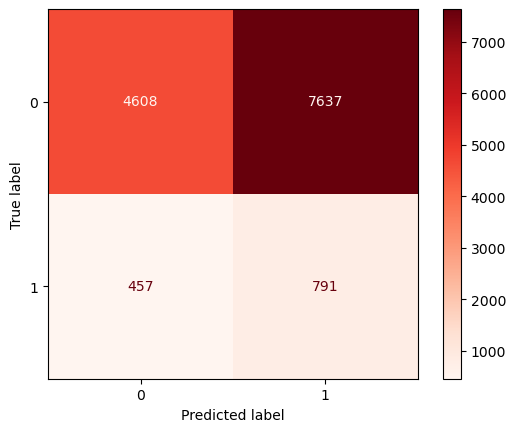

In [2677]:
# Check Performance Model against Test-Set
y_pred_train = rf_randomcv_best.predict(X_train)
y_pred_test = rf_randomcv_best.predict(X_test)

print('Recall Score - Train Set  : \n', classification_report(y_train, y_pred_train))
print('Recall Score - Test Set   : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test, y_test, cmap='Reds'))

Hasil evaluasi Random Forest setelah hyperparameter tuning mengindikasikan kinerja model yang belum optimal. Pada data train, nilai recall (0.66) menunjukkan bahwa model memiliki kemampuan moderat untuk mempelajari pola data. Nilai recall pada test (0.63) menandakan bahwa model sudah goodfit namun masih memiliki ruang untuk improvement lebih lanjut.

Dari nilai recall, model menunjukkan bias yang kuat terhadap kelas 1, dengan recall sebesar 0.66 pada train dan 0.63 pada test. Hal ini menunjukkan bahwa model cukup baik dalam mendeteksi kelas positif. Di sisi lain, recall untuk kelas kelas 0 jauh lebih rendah, yakni 0.38 pada train dan test, yang mengindikasikan bahwa model sering gagal mendeteksi kelas negatif.

Hal ini kemungkinan dapat terjadi karena fitur selection hanya memperhitungkan hubungan korelasi antara kolom feature dengan kolom target. Korelasi dicek melalui statistika dengan nilai p-value yang lebih kecil dari 0.05. Hal ini menyebabkan banyak fitur yang di drop dan tidak dimasukkan ke dalam model. Langkah yang bisa dilakukan adalah dengan berkonsultasi dengan domain knowledge expert terkait data ini sehingga bisa memberikan info feature-feature mana saja yang berpengaruh terhadap target dan tidak hanya bergantung kepada hasil korelasi secara statistik.

# 9. Model Saving

In [2684]:
# Saving file
with open('deployment/rf_randomcv_best.pkl', 'wb') as file_1:
  pickle.dump(rf_randomcv_best, file_1)

# 10. Conclusion

Proses analisa data perbankan untuk mengetahui apakah seseorang akan gagal bayar atau tidak mencakup preprocessing data, termasuk mengurangi level kardinalitas data, melakukan balancing terhadap kelas target yang tidak seimbang, dan pemilihan fitur menggunakan statistik.

Data yang sudah melalui preprocessing akan digunakan sebagai input bagi algoritma agar bisa memprediksi terhadap dataset yang diberikan. Terdapat 5 model yang akan saya uji coba kestabilan dan performanya dengan membandingkan cross validation antar algoritma. Metriks yang saya gunakan adalah recall score karena saya ingin meminimalkan False Negatif (FN) pada model yang diberikan. FN disini berarti perbankan memprediksi bahwa nasabah adalah Non Defaulter (tidak gagal bayar) namun ternyata nasabah tersebut adalah Defaulter (gagal bayar). Ketika nasabah mengalami gagal bayar maka bank akan menerima kerugian dan ini adalah situasi yang paling tidak diinginkan oleh perbankan. 

Model yang paling stabil adalah random forest classifier sehingga model ini akan dituning lebih lanjut agar mendapatkan batas yang diinginkan yaitu sebesar 60% karena model ini masih dalam tahap development. 

Kelebihan dari model yang dihasilkan adalah tetap stabil dan akurat meskipun terdapat outlier. Hal ini disebabkan karena algoritma yang digunakan adalah Random Forest. Random Forest adalah algoritma yang terdiri dari banyak decision trees yang dibangun secara acak menggunakan subset data yang berbeda-beda sehingga model ini tetap dapat memberikan hasil yang terlalu terpengaruh oleh outlier.

Kelemahan dari model yang dihasilkan adalah model yang diperoleh menunjukkan bias yang kuat terhadap kelas 1 yang mana berarti model cukup baik dalam mendeteksi `Defaulter`. Sebaliknya model ini seringkali gagal dalam mendeteksi kelas negatif `Non Defaulter`. Hal ini kemungkinan dapat terjadi karena fitur selection hanya memperhitungkan hubungan korelasi antara kolom feature dengan kolom target menggunakan statistika yang menyebabkan banyak fitur di drop dan tidak dimasukkan ke dalam model. Feature selection yang hanya bergantung pada statistik dapat mengabaikan fitur penting yang tidak memiliki korelasi langsung tetapi relevan secara domain. Hal ini dapat membatasi kemampuan model untuk menangkap pola kompleks yang memengaruhi risiko gagal bayar.

Improvement yang bisa dilakukan adalah dengan berkonsultasi dengan domain knowledge expert terkait data ini sehingga bisa mendapatkan informasi mengenai fitur-fitur mana saja yang berpengaruh terhadap target dan tidak hanya bergantung kepada hasil korelasi secara statistik.

# 11. Recommendation

Model ini ditujukan untuk membantu tim risk analysis dalam mengevaluasi tingkat risiko terkait dengan calon peminjam. Dengan memprediksi kemungkinan gagal bayar, tim ini dapat membuat keputusan yang lebih bijaksana mengenai persetujuan pinjaman, batas kredit, atau persyaratan tambahan seperti jaminan atau tingkat suku bunga yang lebih tinggi. Namun perlu diingat bahwa model ini masih dalam tahap pengembangan dan perlu diimprove lebih lanjut. Selain itu, model ini juga ditujukan sebagai analisa awal dan tidak dapat dijadikan sebagai satu-satunya alat pengambil keputusan tanpa diiringi pertimbangan lainnya.

Untuk menjaga efektivitas model dan memastikan bahwa performanya tetap optimal seiring dengan munculnya data baru, evaluasi model akan dilakukan secara rutin terhadap data baru yang diperoleh. Proses evaluasi ini mencakup pengujian ulang menggunakan metrik yang telah ditetapkan serta membandingkan performa model terhadap data historis dan data terbaru. Jika ditemukan penurunan performa yang signifikan atau adanya pergeseran pola data, langkah-langkah perbaikan seperti retraining model, penyesuaian hyperparameter, atau eksplorasi model baru dapat dilakukan. Dengan pendekatan ini, model diharapkan dapat tetap relevan dan akurat dalam membantu perbankan mengidentifikasi risiko gagal bayar nasabah secara konsisten.